# Data Preprocessing

## Import neccesary libarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the DataSet

In [2]:
# Load the dataset
data = pd.read_csv('bank-full.csv' , sep=';')

# View the first few rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#view the last few rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Sanity check data

In [4]:
# Check the shape of the data
# cloums and rows
data.shape

(45211, 17)

In [5]:
# Check column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

In [8]:
#identify the unique values and garbage values
for i in data.select_dtypes(include='object').columns:
    print(f'\nUnique values in {i} are {data[i].unique()}')


Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital are ['married' 'single' 'divorced']

Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default are ['no' 'yes']

Unique values in housing are ['yes' 'no']

Unique values in loan are ['no' 'yes']

Unique values in contact are ['unknown' 'cellular' 'telephone']

Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in poutcome are ['unknown' 'failure' 'other' 'success']

Unique values in y are ['no' 'yes']


## Missing Value Treatment

In [9]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [10]:
# Handle missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        # For categorical columns
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True) 
        else:
            data[col].fillna(data[col].median(), inplace=True)  # Fill numerical with median

print("Missing values treated.")


Missing values treated.


In [11]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Duplicate and Garbage value treatment

In [12]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
data = data.drop_duplicates()

Number of duplicate rows: 0


# Exploratory Data Analysis (EDA)

In [13]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [14]:
data.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


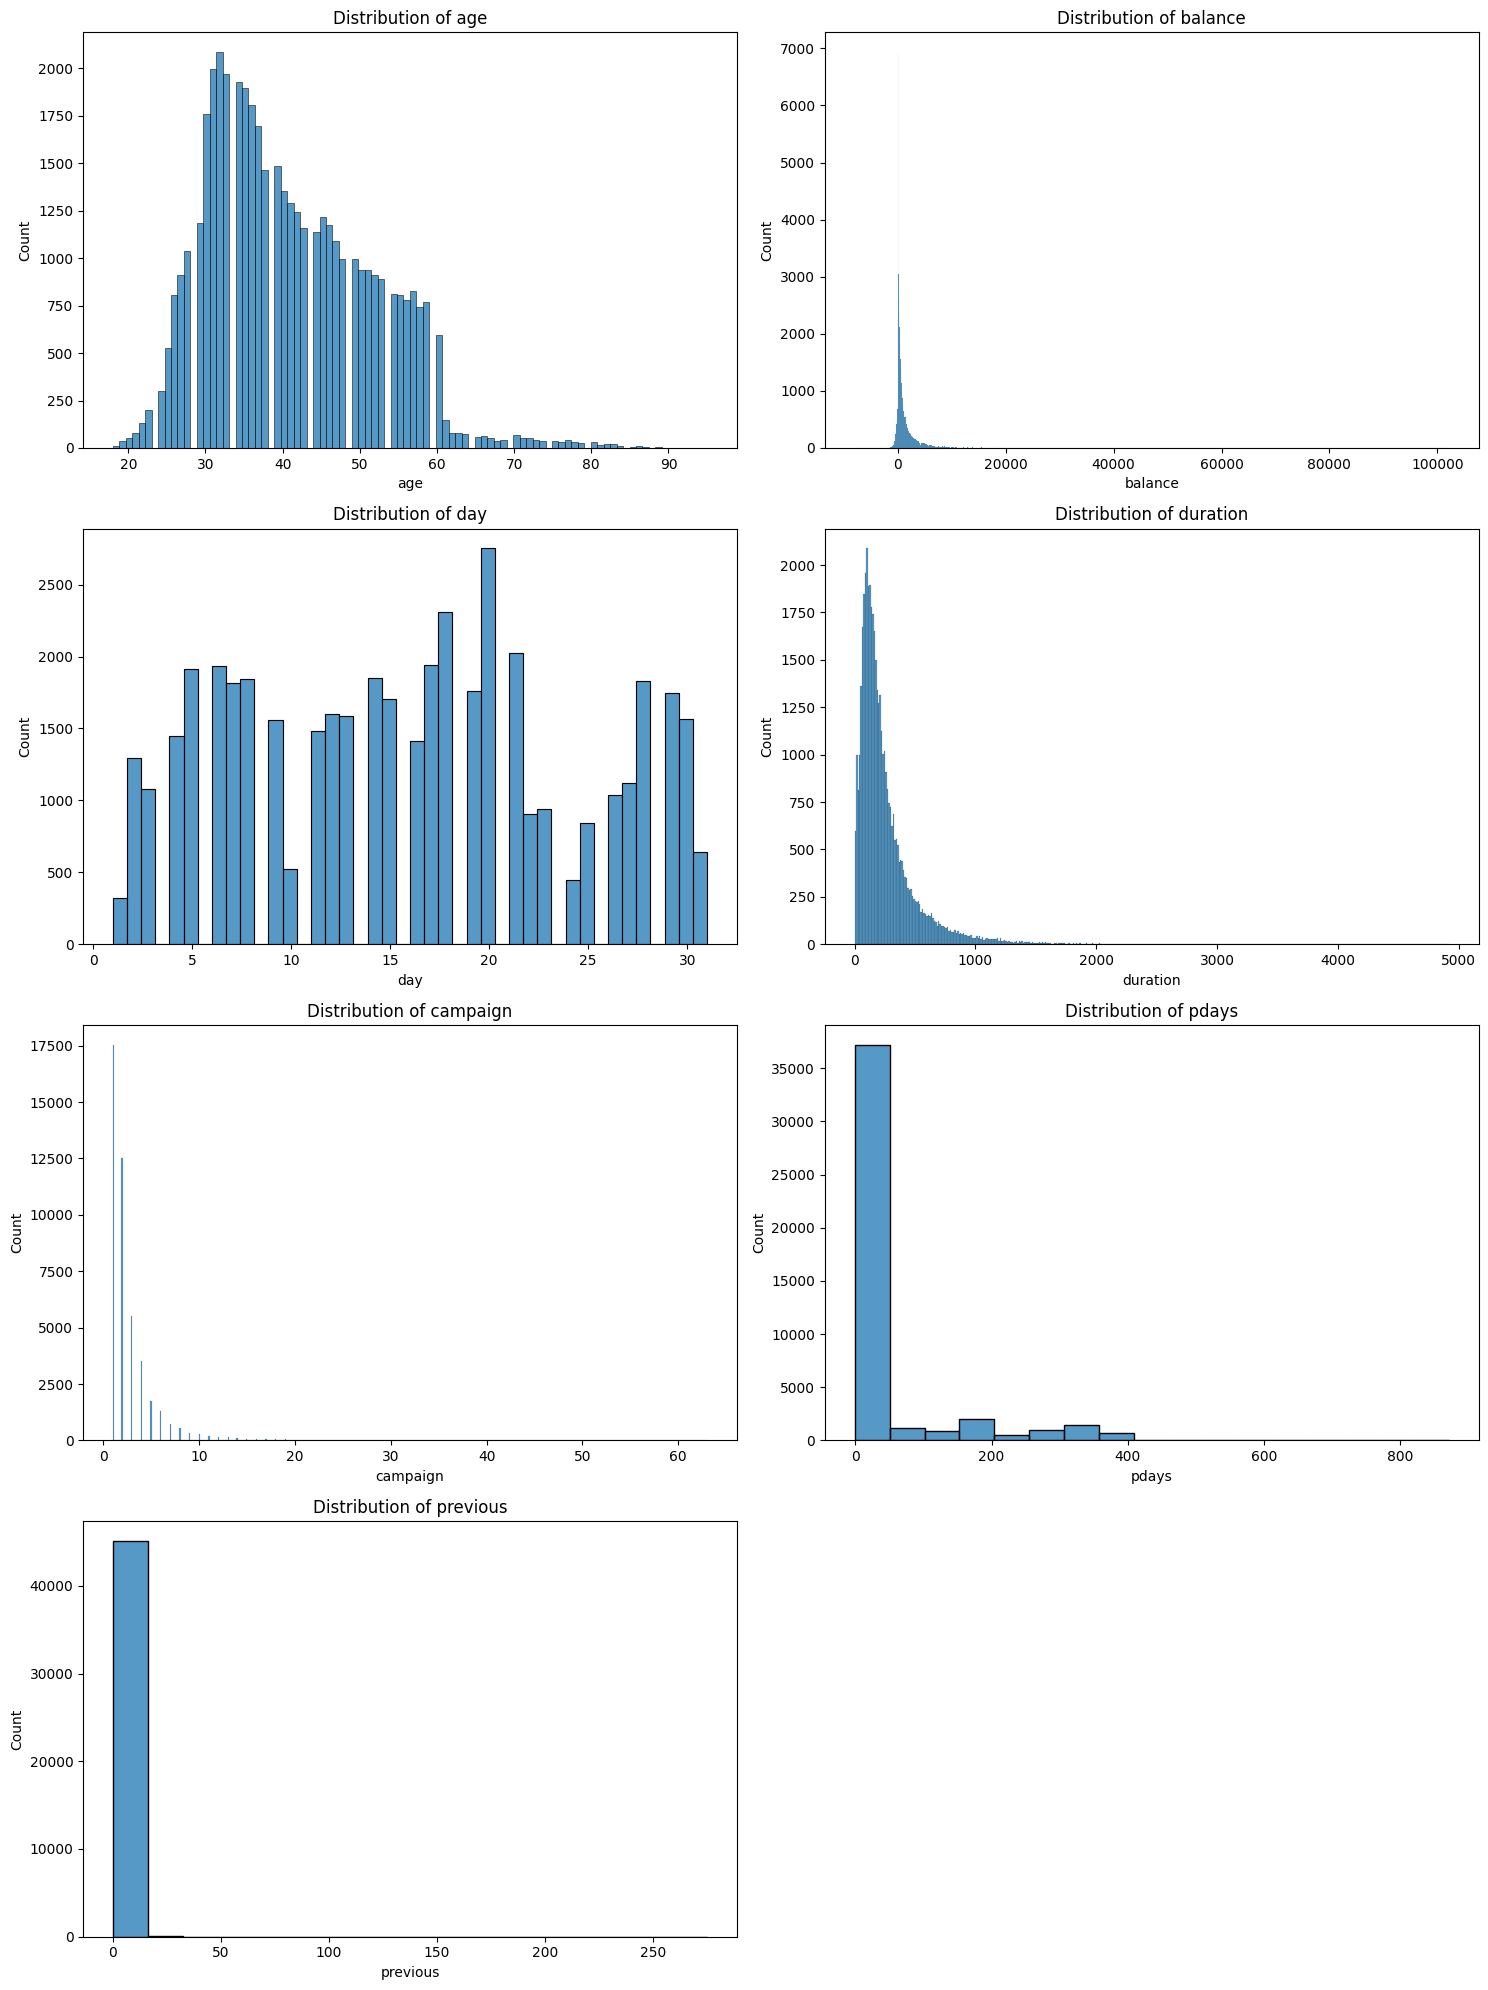

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


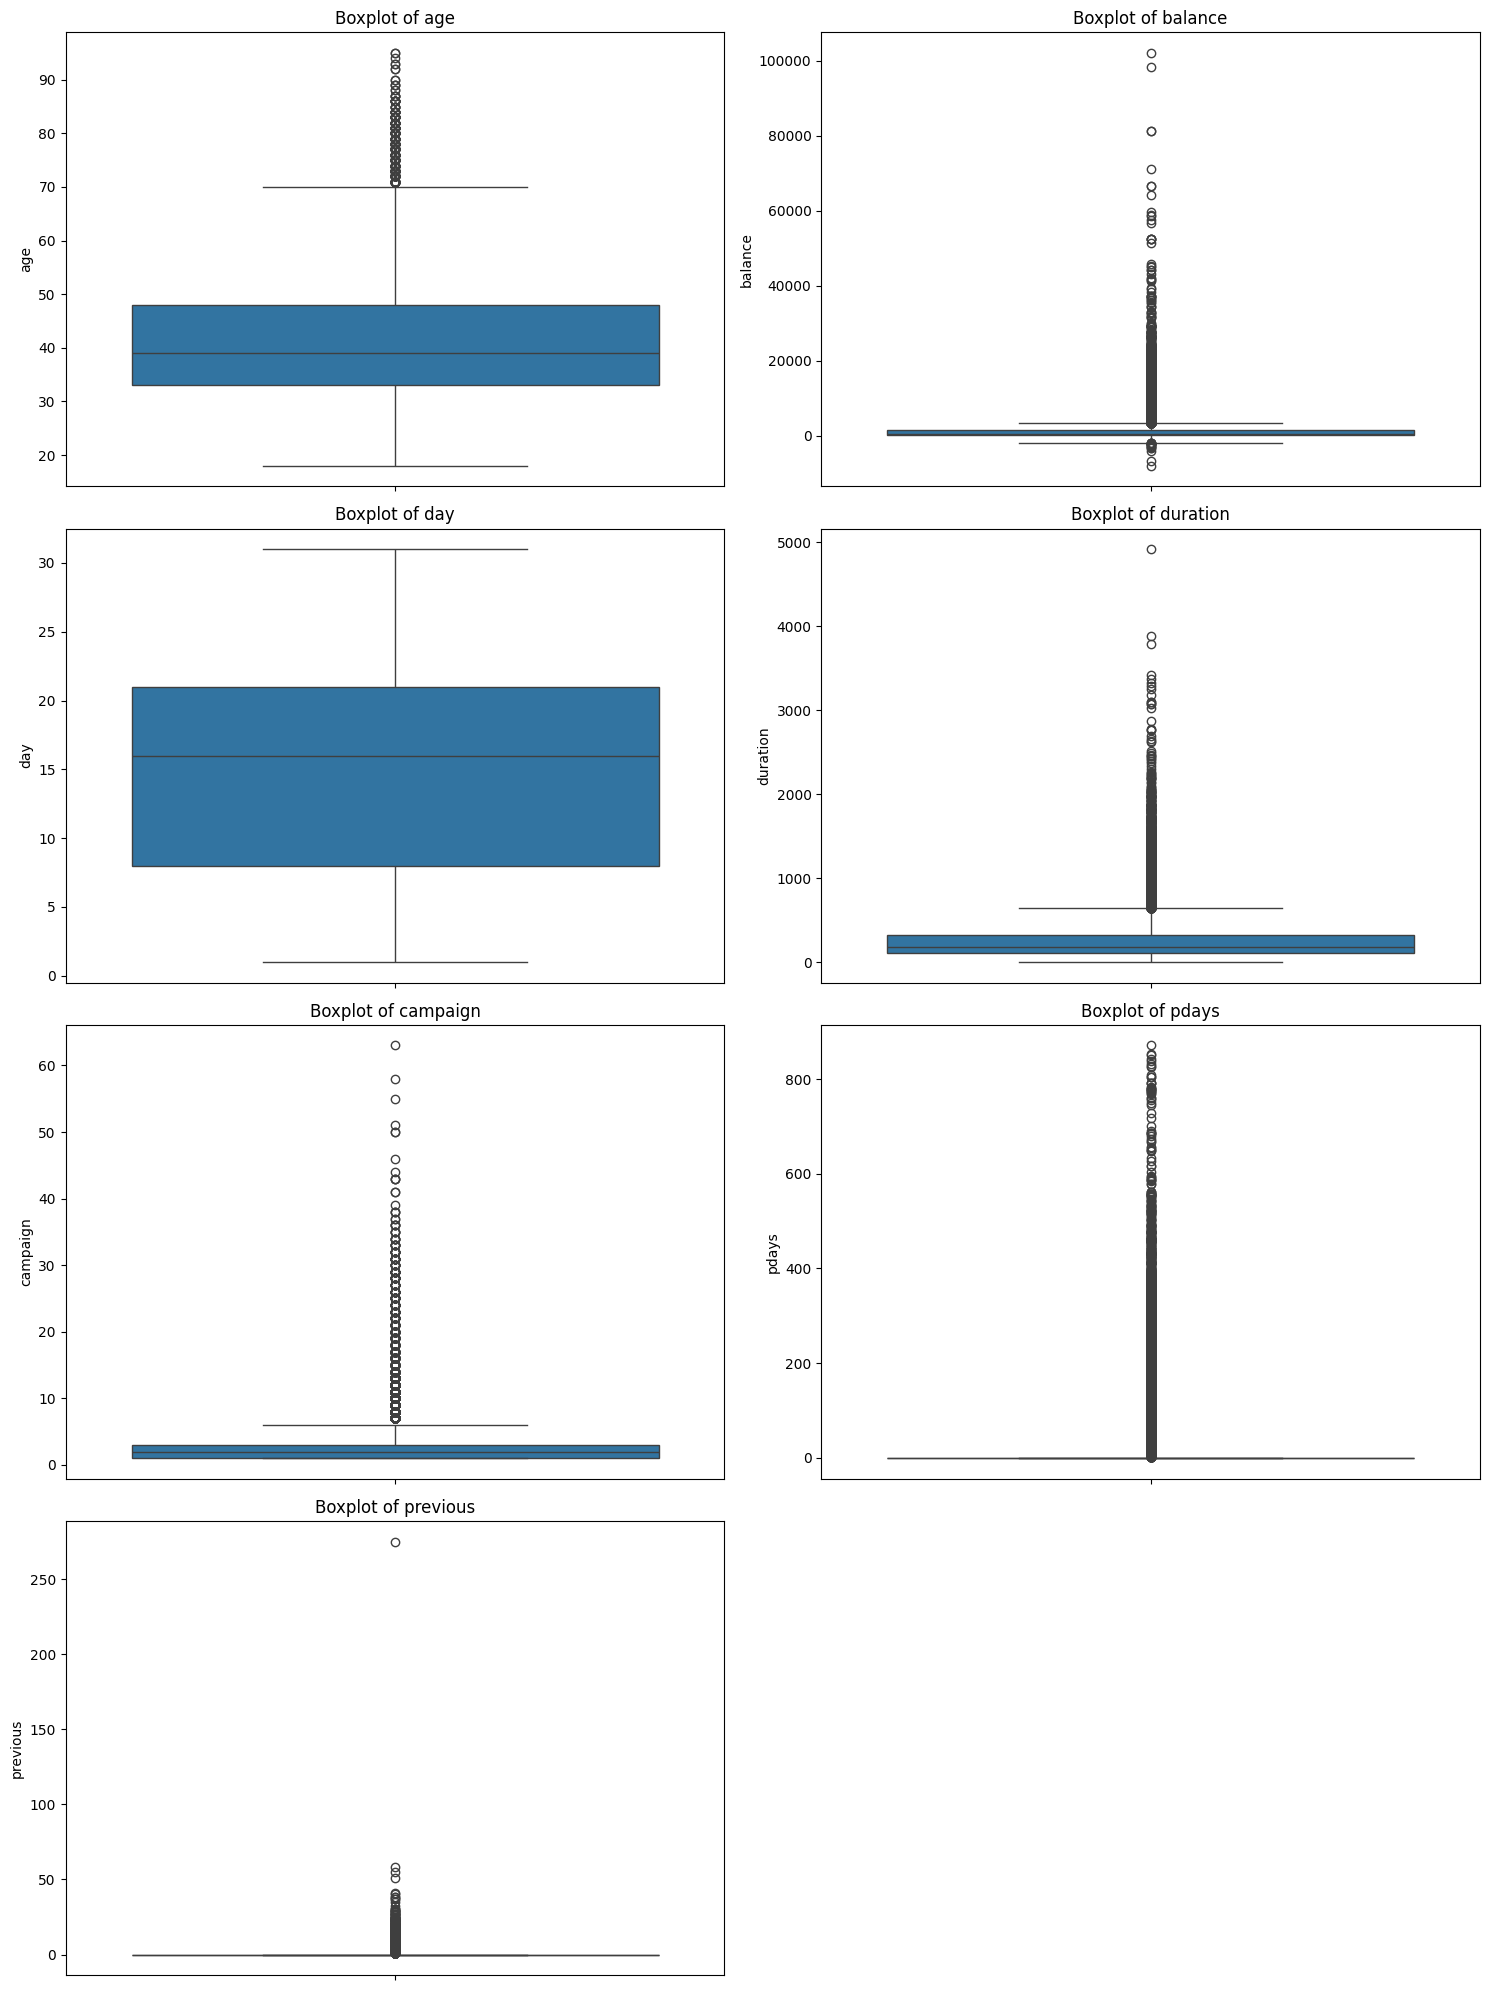

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])  # Use 'y' for vertical boxplots
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


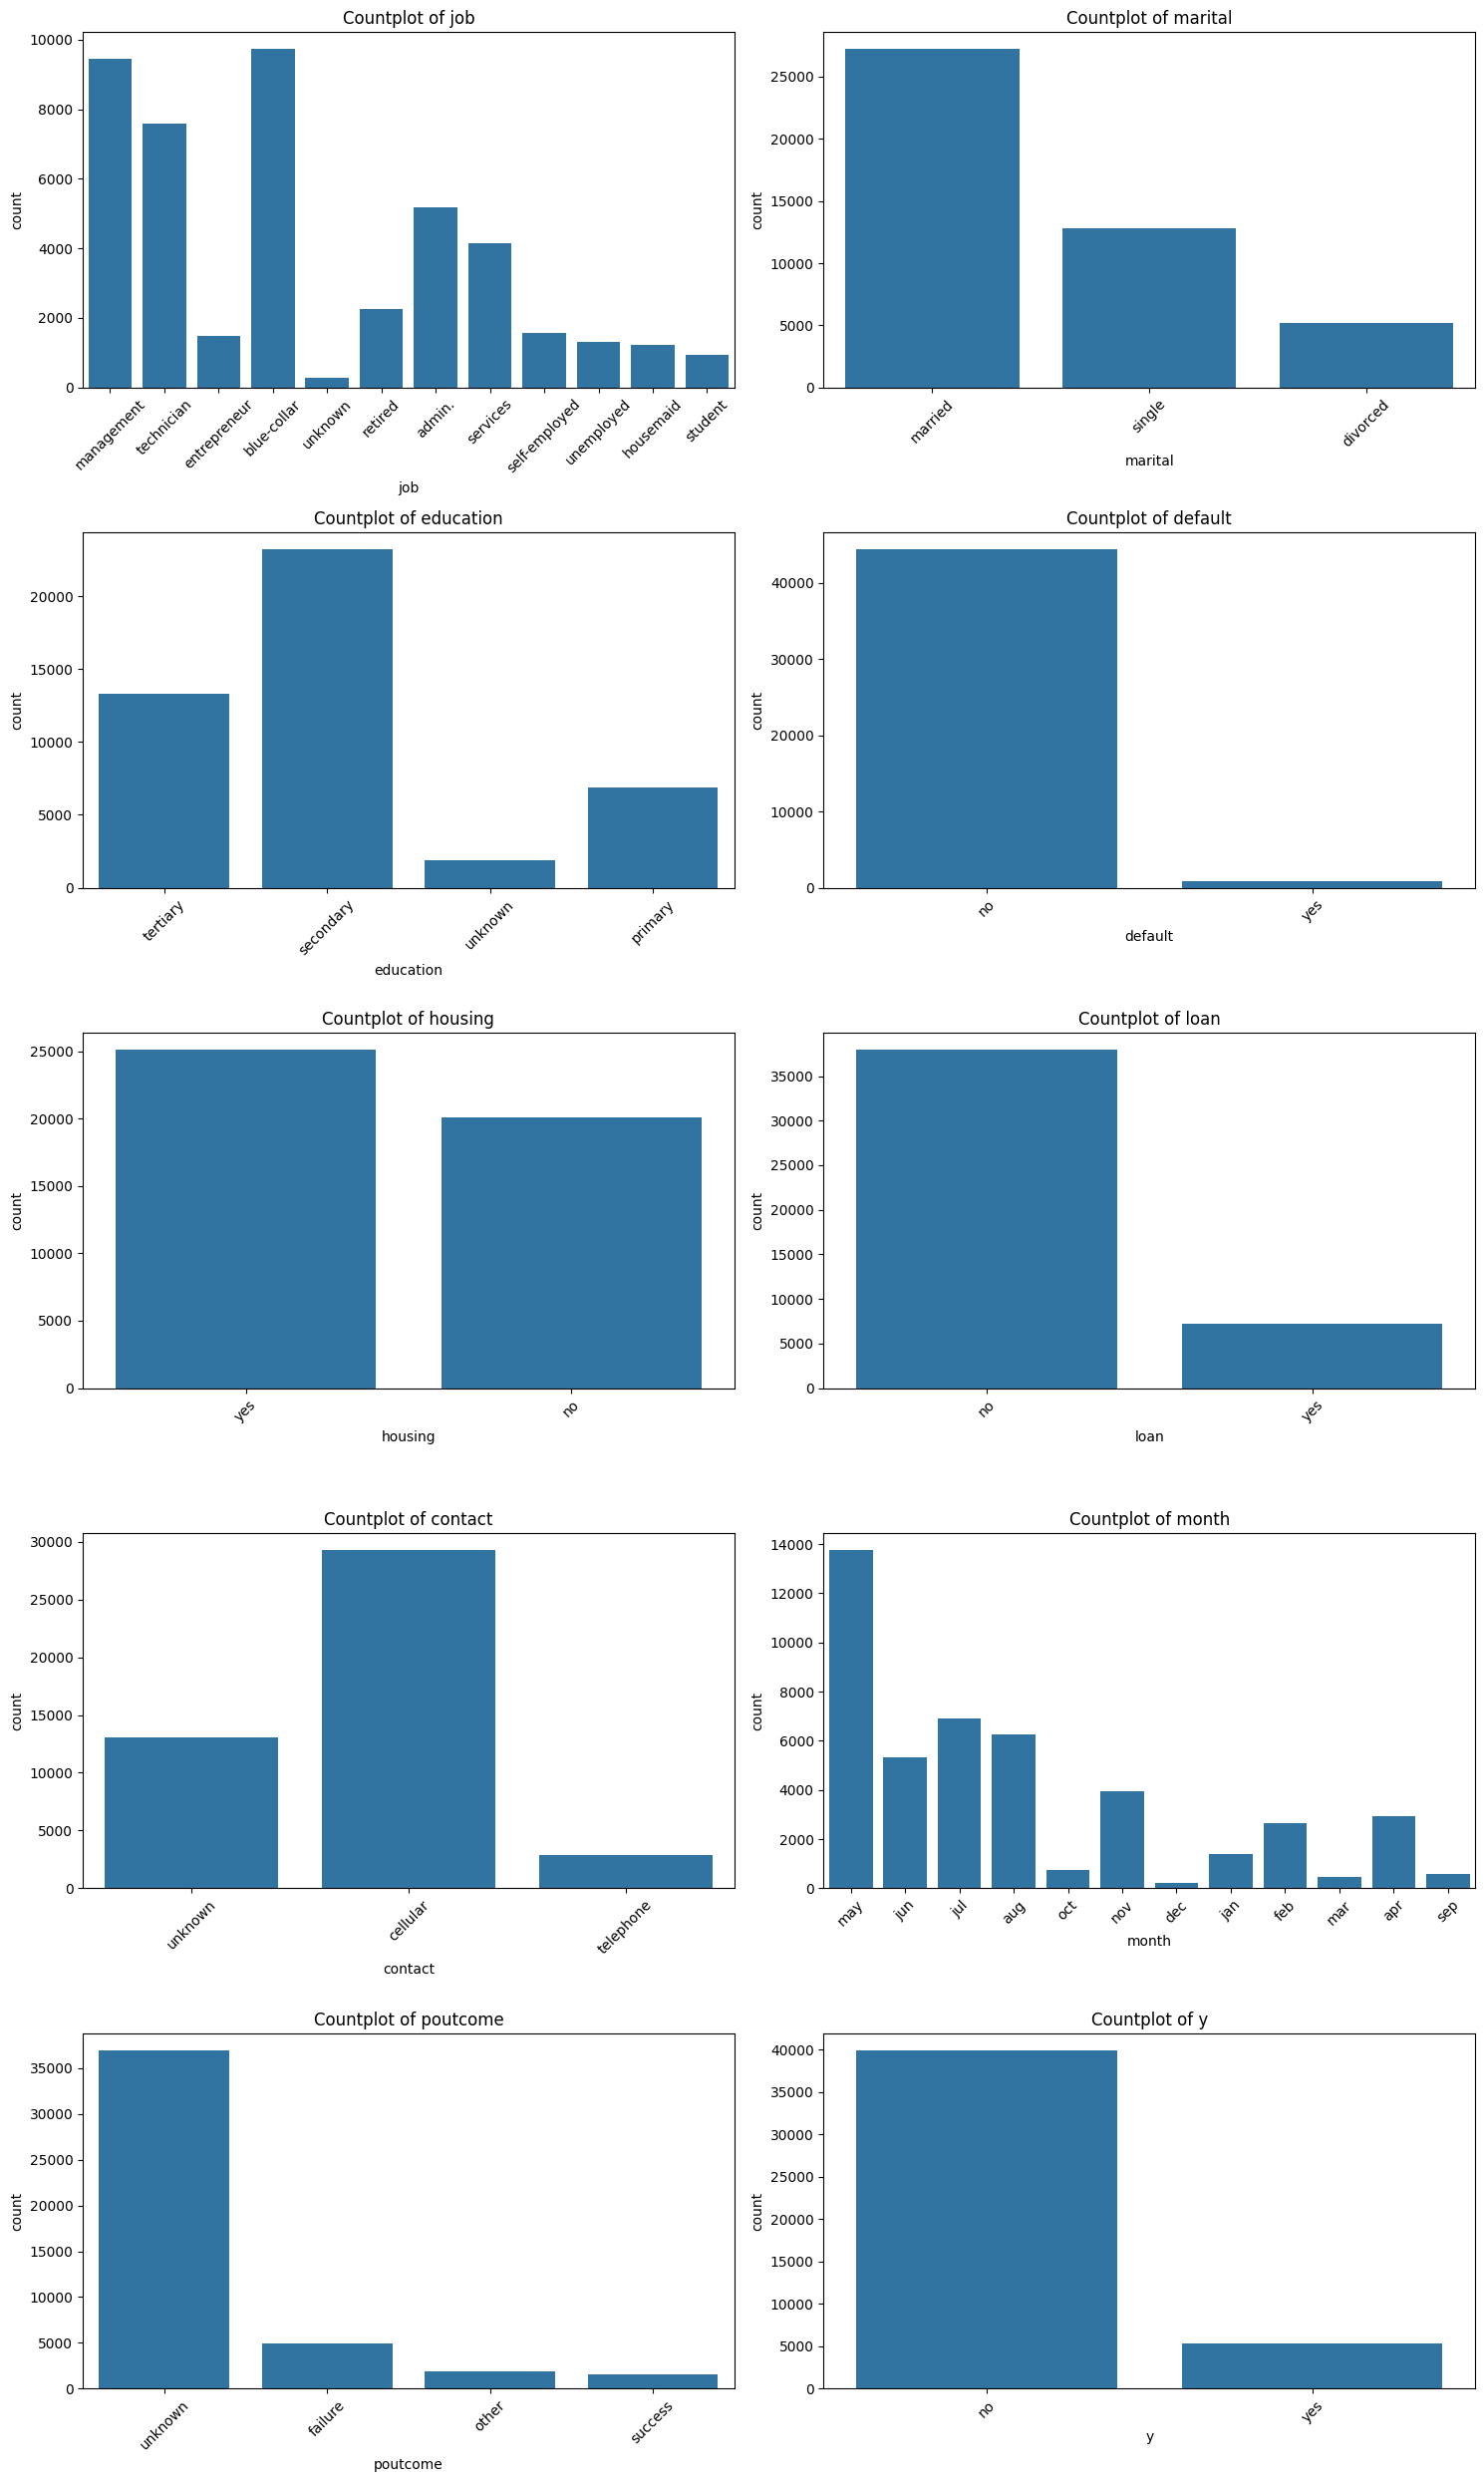

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns
categorical_columns = data.select_dtypes(include='object').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each barplot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i])  # Use countplot for categorical data
    axes[i].set_title(f"Countplot of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


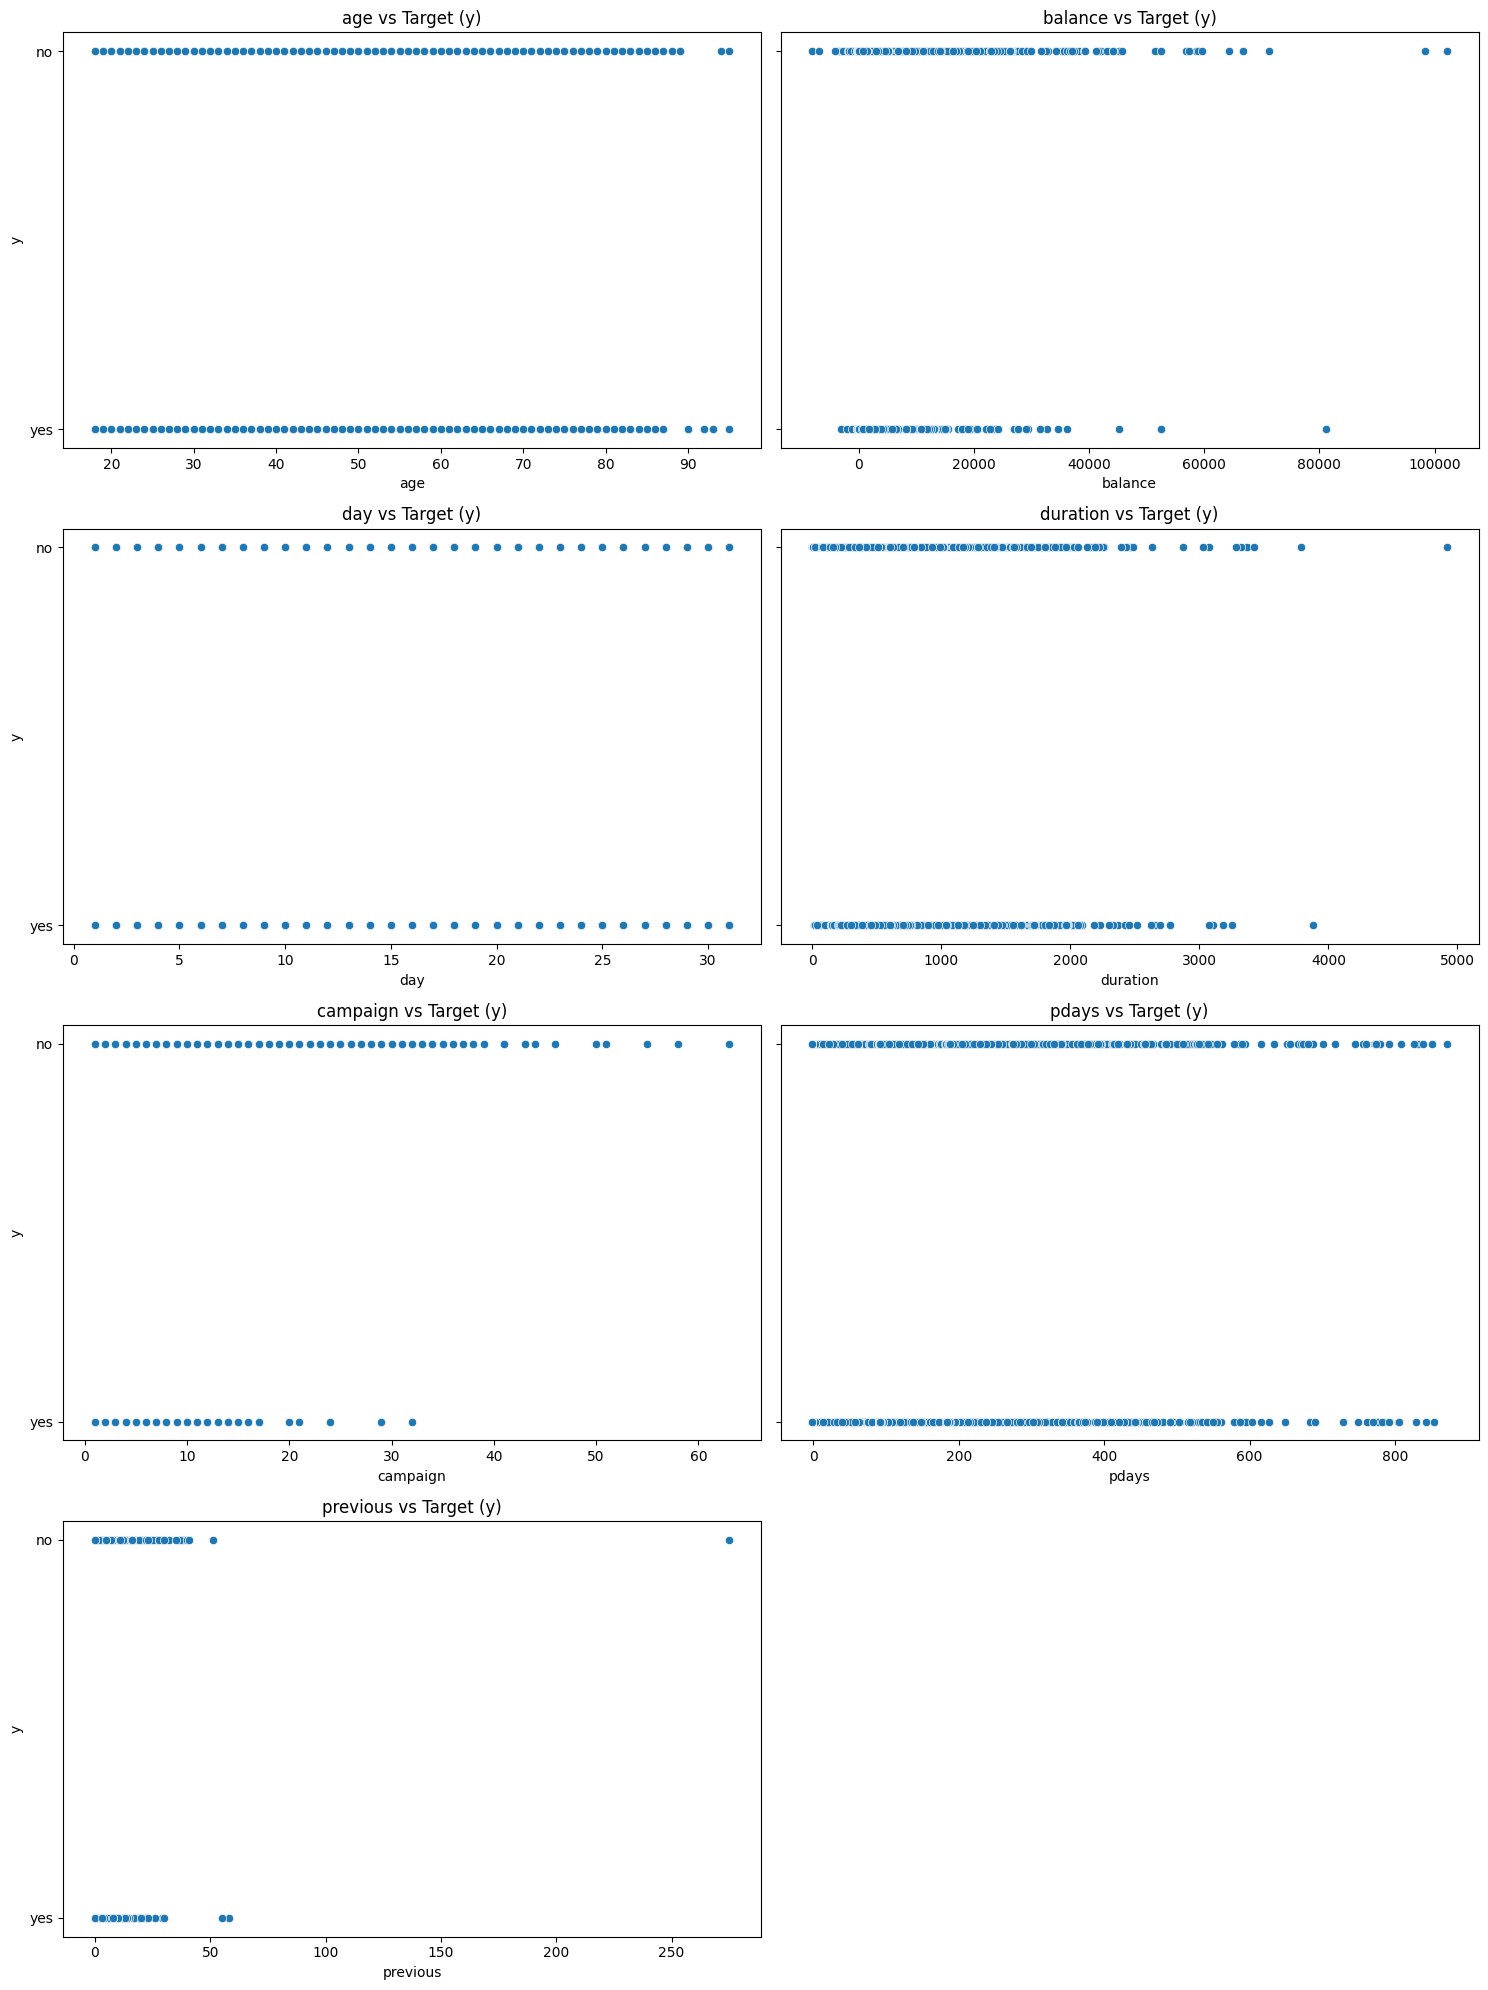

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharey=True)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each scatterplot
for i, col in enumerate(numerical_features):
    sns.scatterplot(x=data[col], y=data['y'], ax=axes[i])
    axes[i].set_title(f"{col} vs Target (y)")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


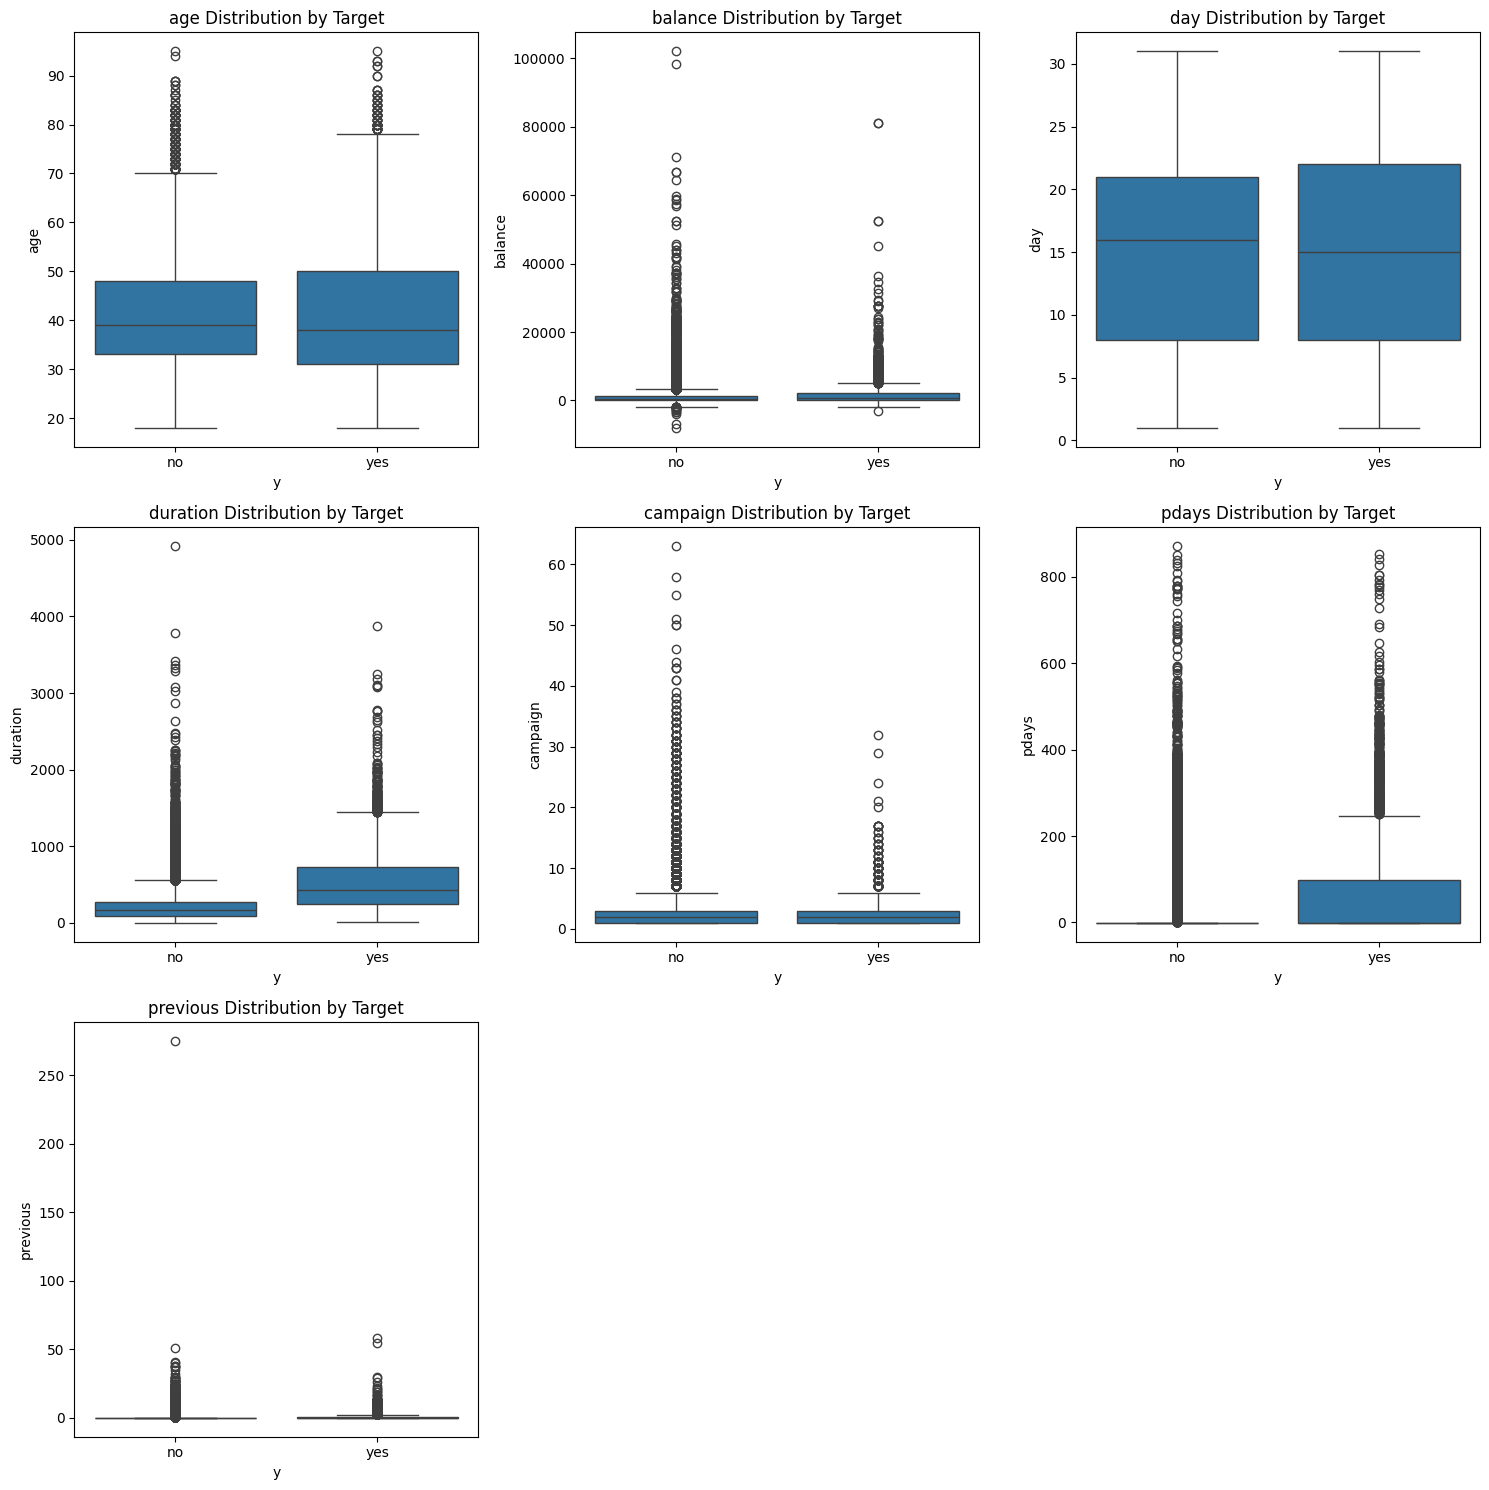

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the numerical columns (excluding target 'y')
numerical_columns = data.select_dtypes(include='number').columns

n_cols = 3  # Number of columns (adjust as needed)
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each numerical feature against the target 'y'
for i, col in enumerate(numerical_columns):
    # For boxplot (for numerical vs categorical target 'y')
    sns.boxplot(x='y', y=col, data=data, ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Target')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

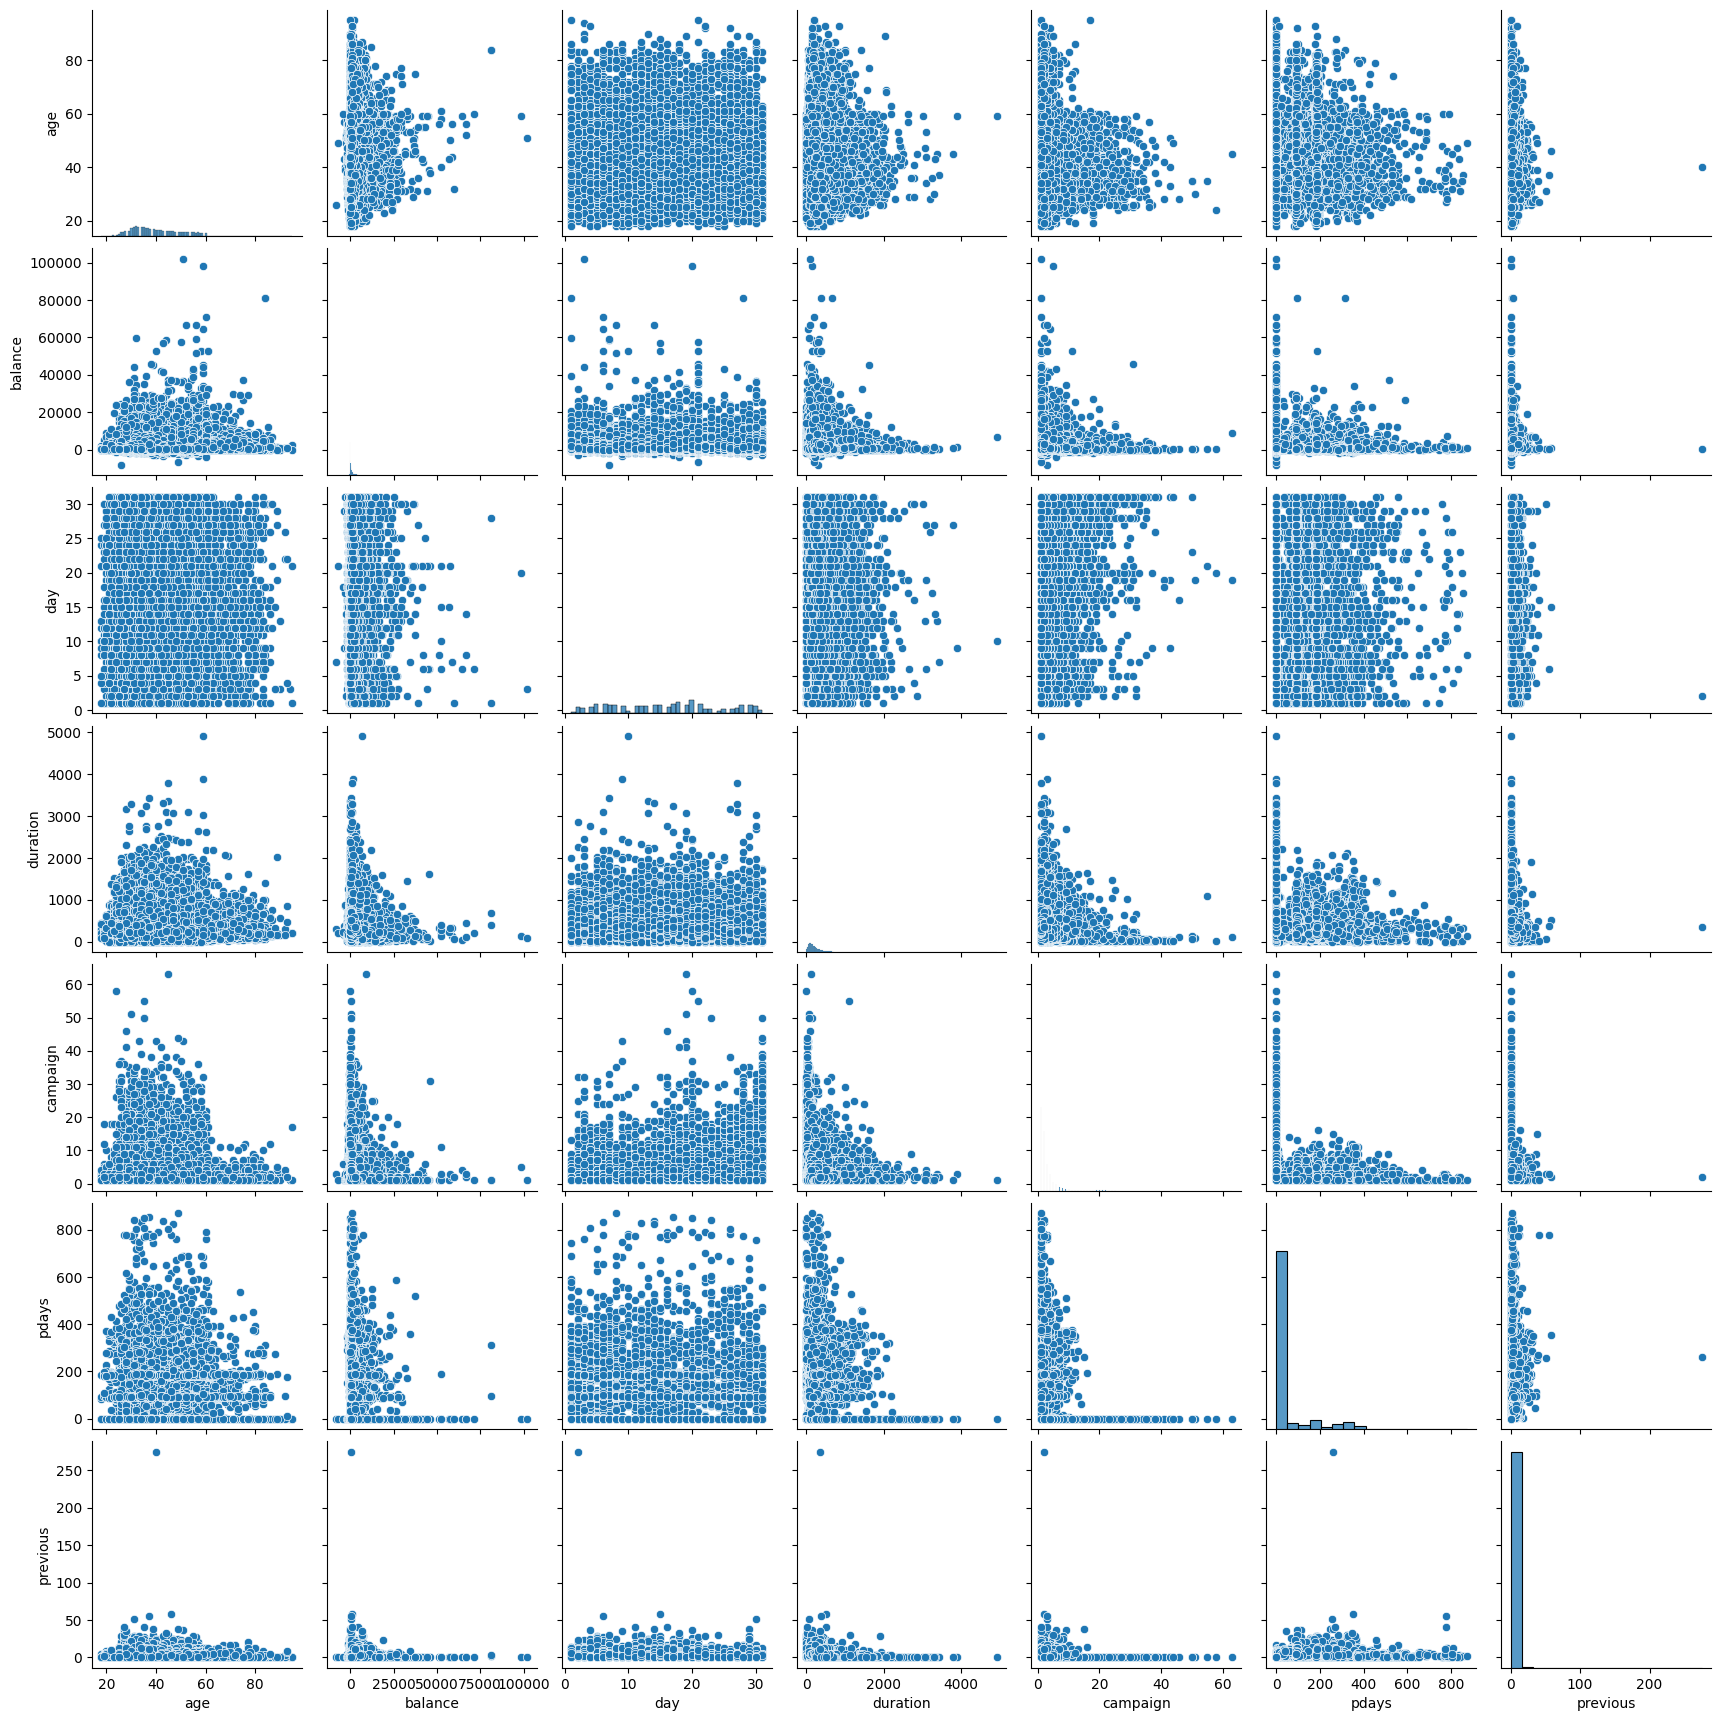

In [20]:
sns.pairplot(data)
plt.show()


In [21]:
# from scipy.stats import zscore

# # Calculate Z-scores for each numerical column
# numerical_columns = data.select_dtypes(include='number').columns
# numerical_columns = numerical_columns[numerical_columns != 'y']  # Exclude target column

# # Compute Z-scores
# z_scores = data[numerical_columns].apply(zscore)

# # Identify outliers (where Z-score > 3 or < -3)
# outliers = (z_scores > 3) | (z_scores < -3)

# # Display rows with outliers
# outliers_data = data[outliers.any(axis=1)]
# outliers_data


In [22]:
# # Calculate IQR for each numerical feature
# Q1 = data[numerical_columns].quantile(0.25)
# Q3 = data[numerical_columns].quantile(0.75)
# IQR = Q3 - Q1

# # Identify outliers
# outliers_iqr = (data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))

# # Display rows with outliers
# outliers_data_iqr = data[outliers_iqr.any(axis=1)]
# print(outliers_data_iqr)


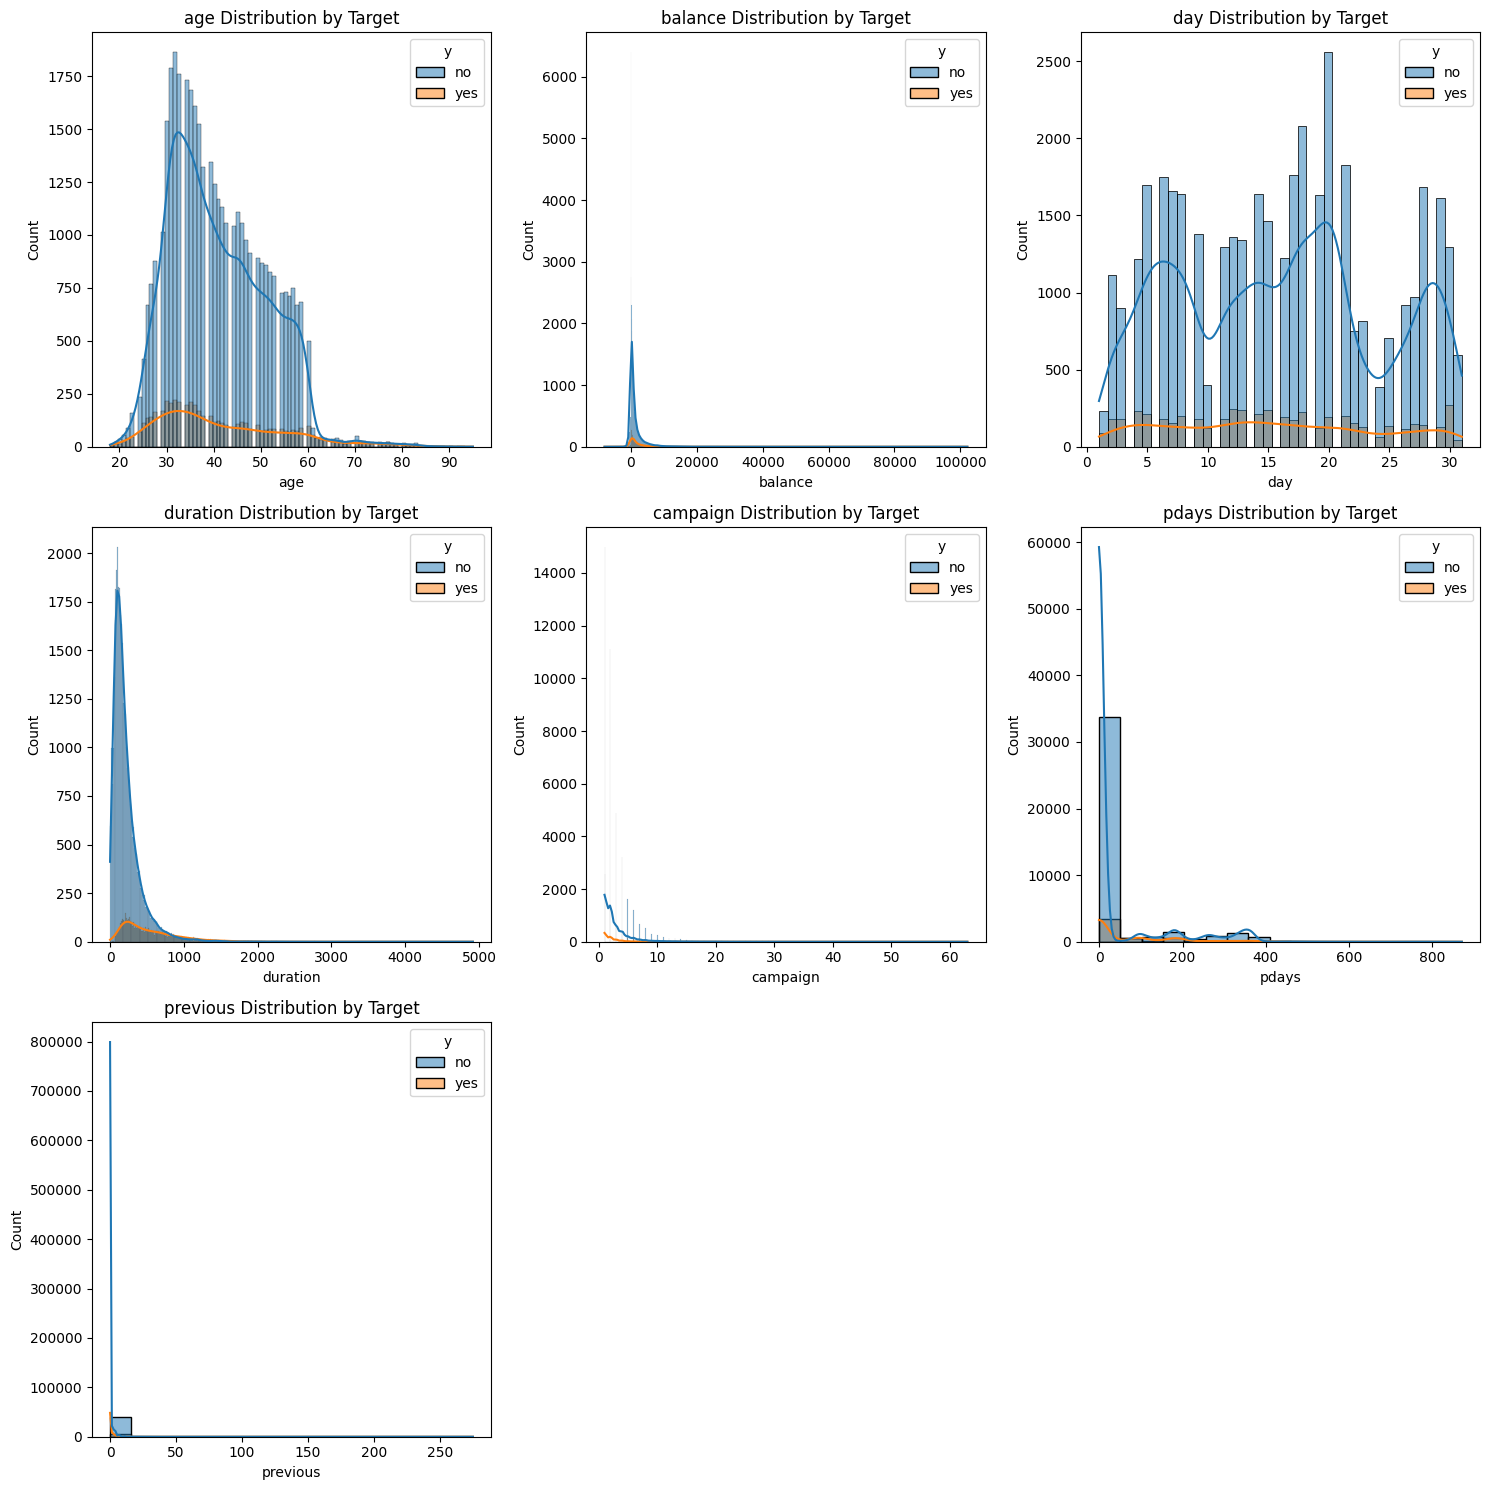

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of numerical columns (excluding the target 'y')
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 3  # Number of columns (adjust as needed)
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each numerical feature against the target 'y'
for i, col in enumerate(numerical_columns):
    # For histogram (numerical feature distribution by target 'y')
    sns.histplot(data=data, x=col, hue='y', kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Target')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [24]:
# for col in data.select_dtypes(include='number').columns:
#     sns.scatterplot(x=data[col], y=data['y'])
#     plt.title(f"{col} vs Target (y)")
#     plt.show()


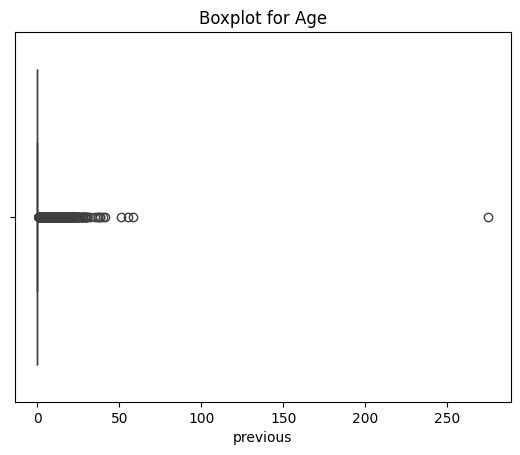

In [25]:
# Boxplot for 'age'
sns.boxplot(x=data['previous'])
plt.title('Boxplot for Age')
plt.show()



##### old

In [26]:
# #histogram to understand the distribution of the data
# for i in data.select_dtypes(include='number').columns:
#     sns.histplot(data=data, x= i)
#     plt.show()

In [27]:
# # Boxplot to identify the outliers
# for i in data.select_dtypes(include='number').columns:
#     sns.boxplot(data=data, x= i)
#     plt.show()

In [28]:
# #scatter plot to understand the relationship between the variables
# for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
#     sns.scatterplot(data=data, x=i, y=data['y'])
#     plt.show() 

In [29]:
# #correlation heatmap to interpreat the realationship and mulitcollinearity 
# s = data.select_dtypes(include='number').corr()
# sns.heatmap(s, annot=True)

# Outlier Treatment

In [30]:
data = data[data['previous'] != 275]

In [31]:
# Verify the rows have been dropped
print(f"Number of rows after dropping: {data.shape[0]}")

Number of rows after dropping: 45210


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  duration   45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


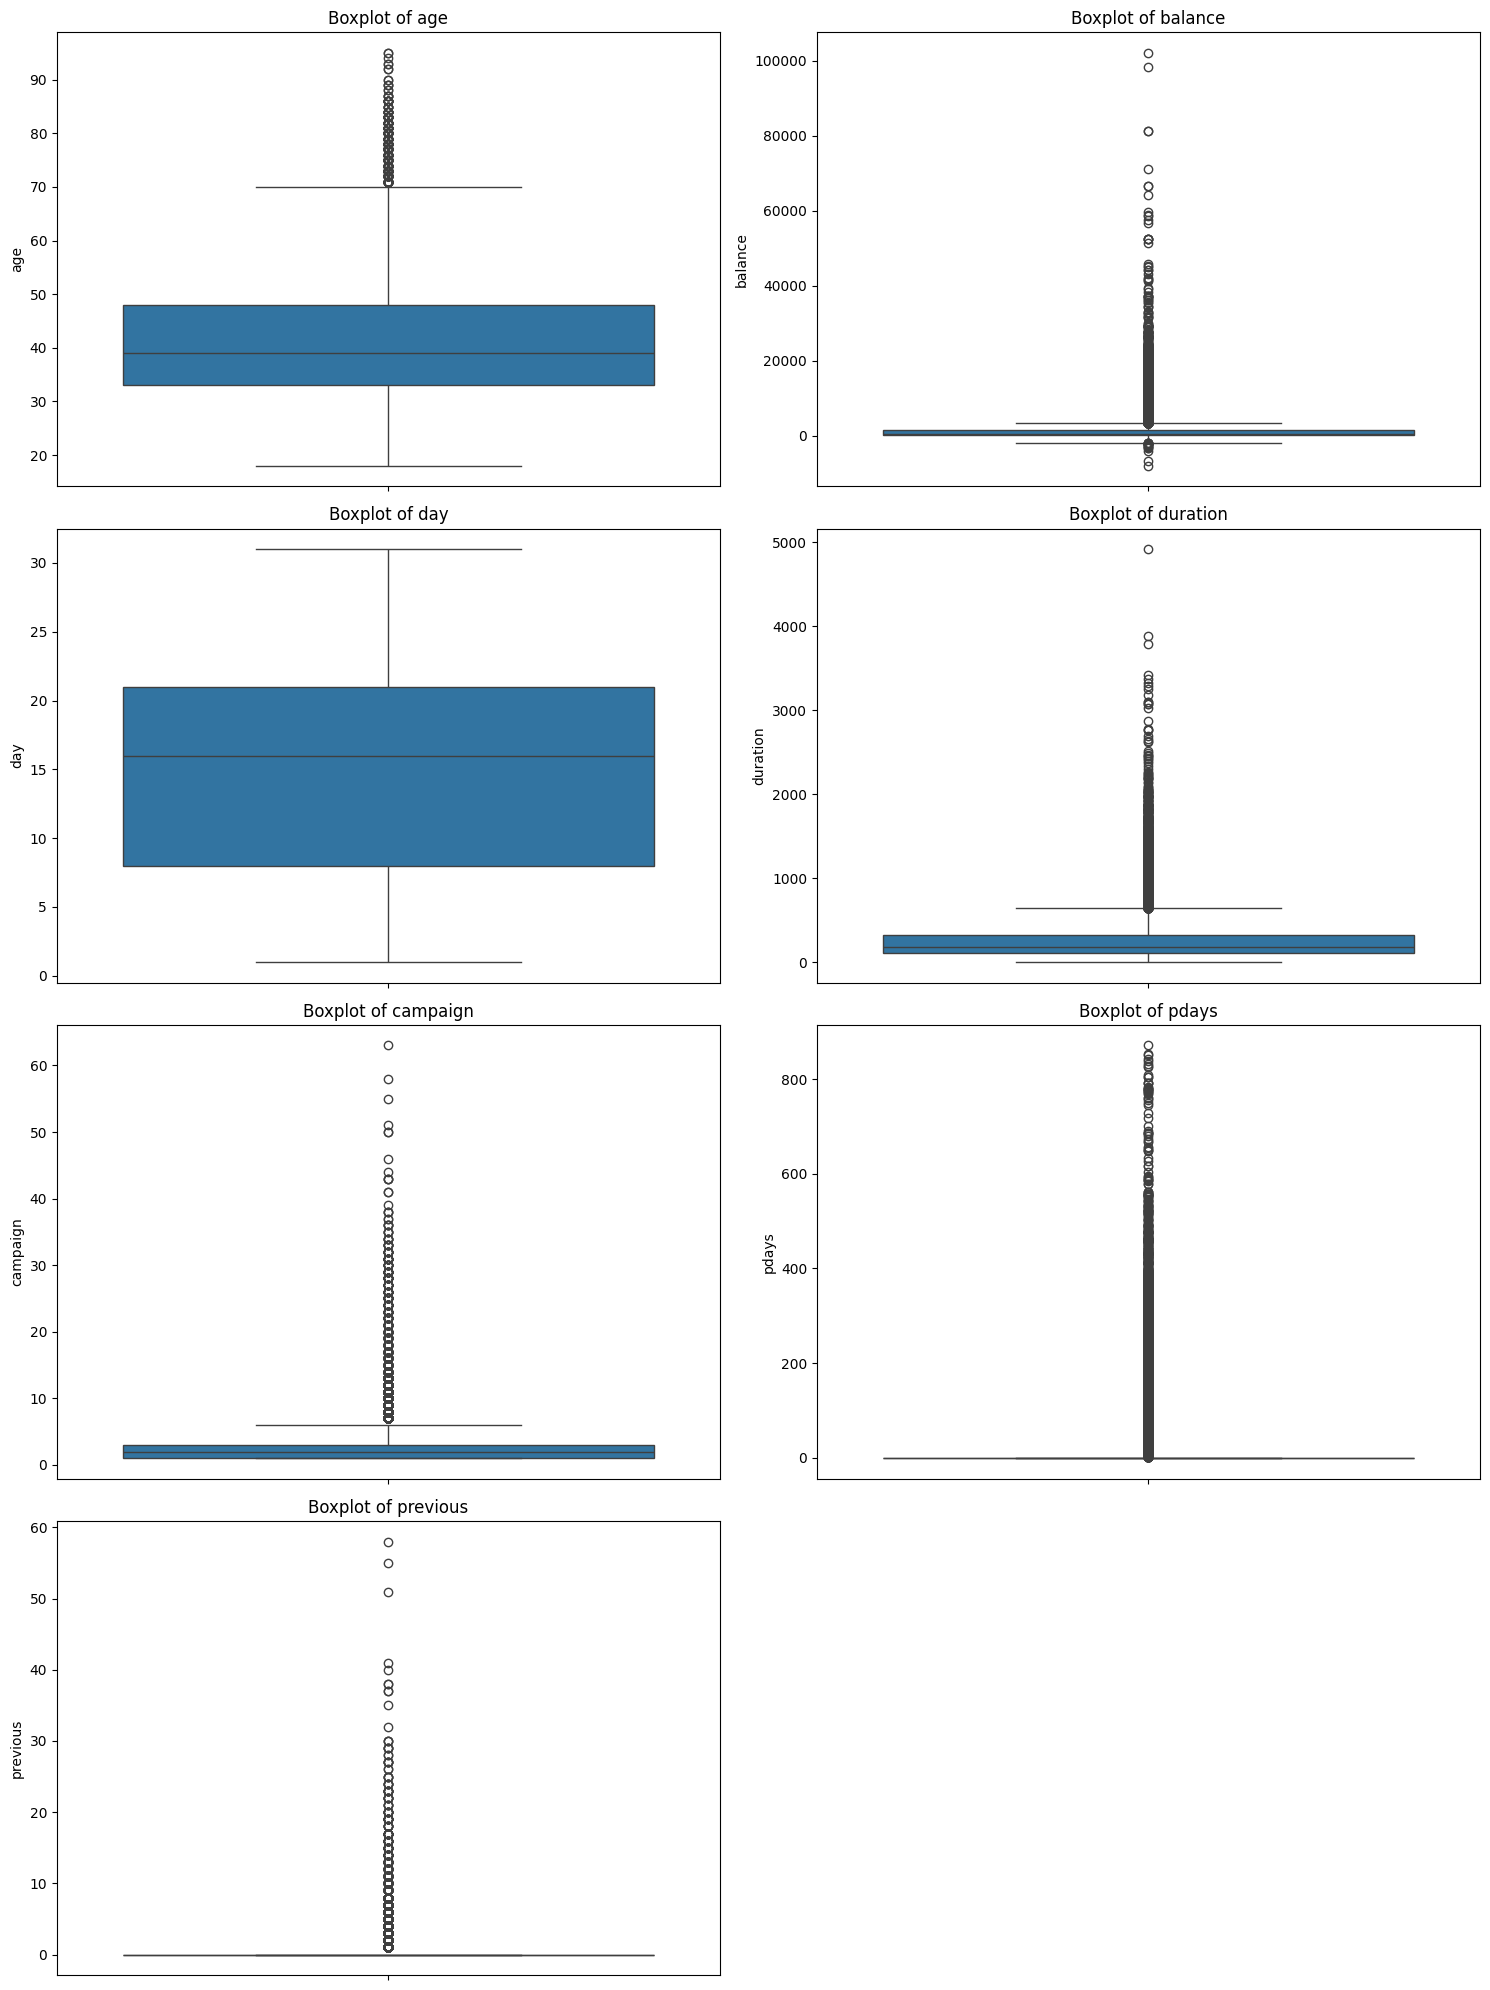

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])  # Use 'y' for vertical boxplots
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  duration   45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [35]:
# Cap 'campaign' at 99th percentile
cap_campaign = data['campaign'].quantile(0.99)
data['campaign'] = data['campaign'].clip(upper=cap_campaign)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  duration   45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [37]:
# Cap 'previous' at 99th percentile
cap_previous = data['previous'].quantile(0.99)
data['previous'] = data['previous'].clip(upper=cap_previous)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  duration   45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [39]:
# data.to_csv("check.csv")

In [40]:
# # Cap 'duration' at 99th percentile
# cap_campaign = data['duration'].quantile(0.99)
# data['duration'] = data['duration'].clip(upper=cap_campaign)

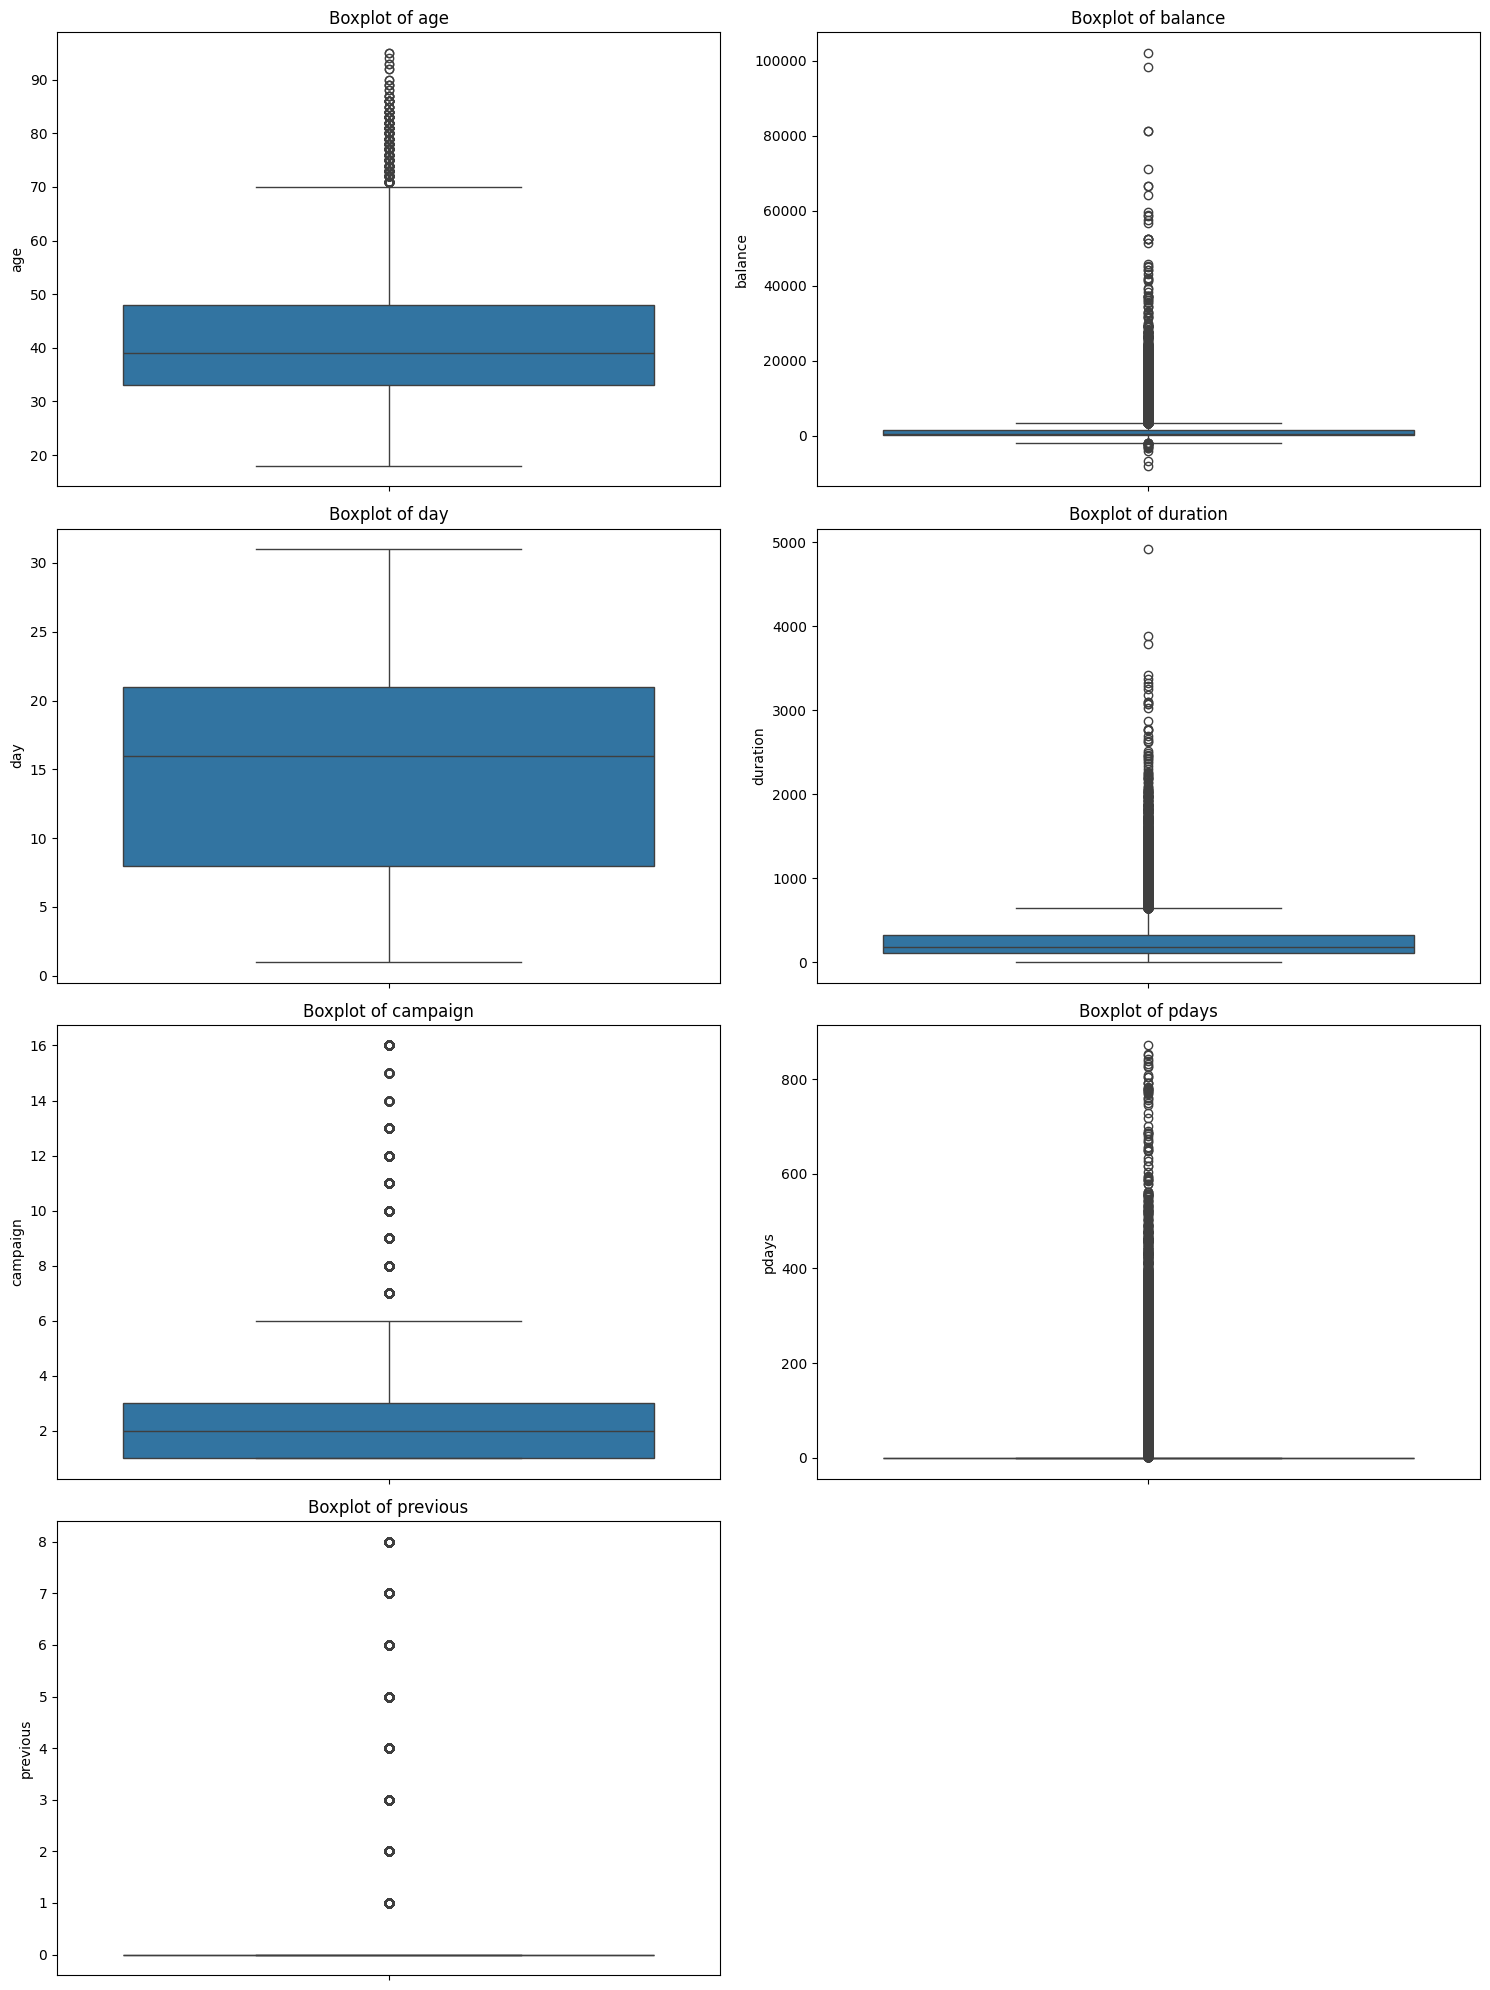

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])  # Use 'y' for vertical boxplots
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


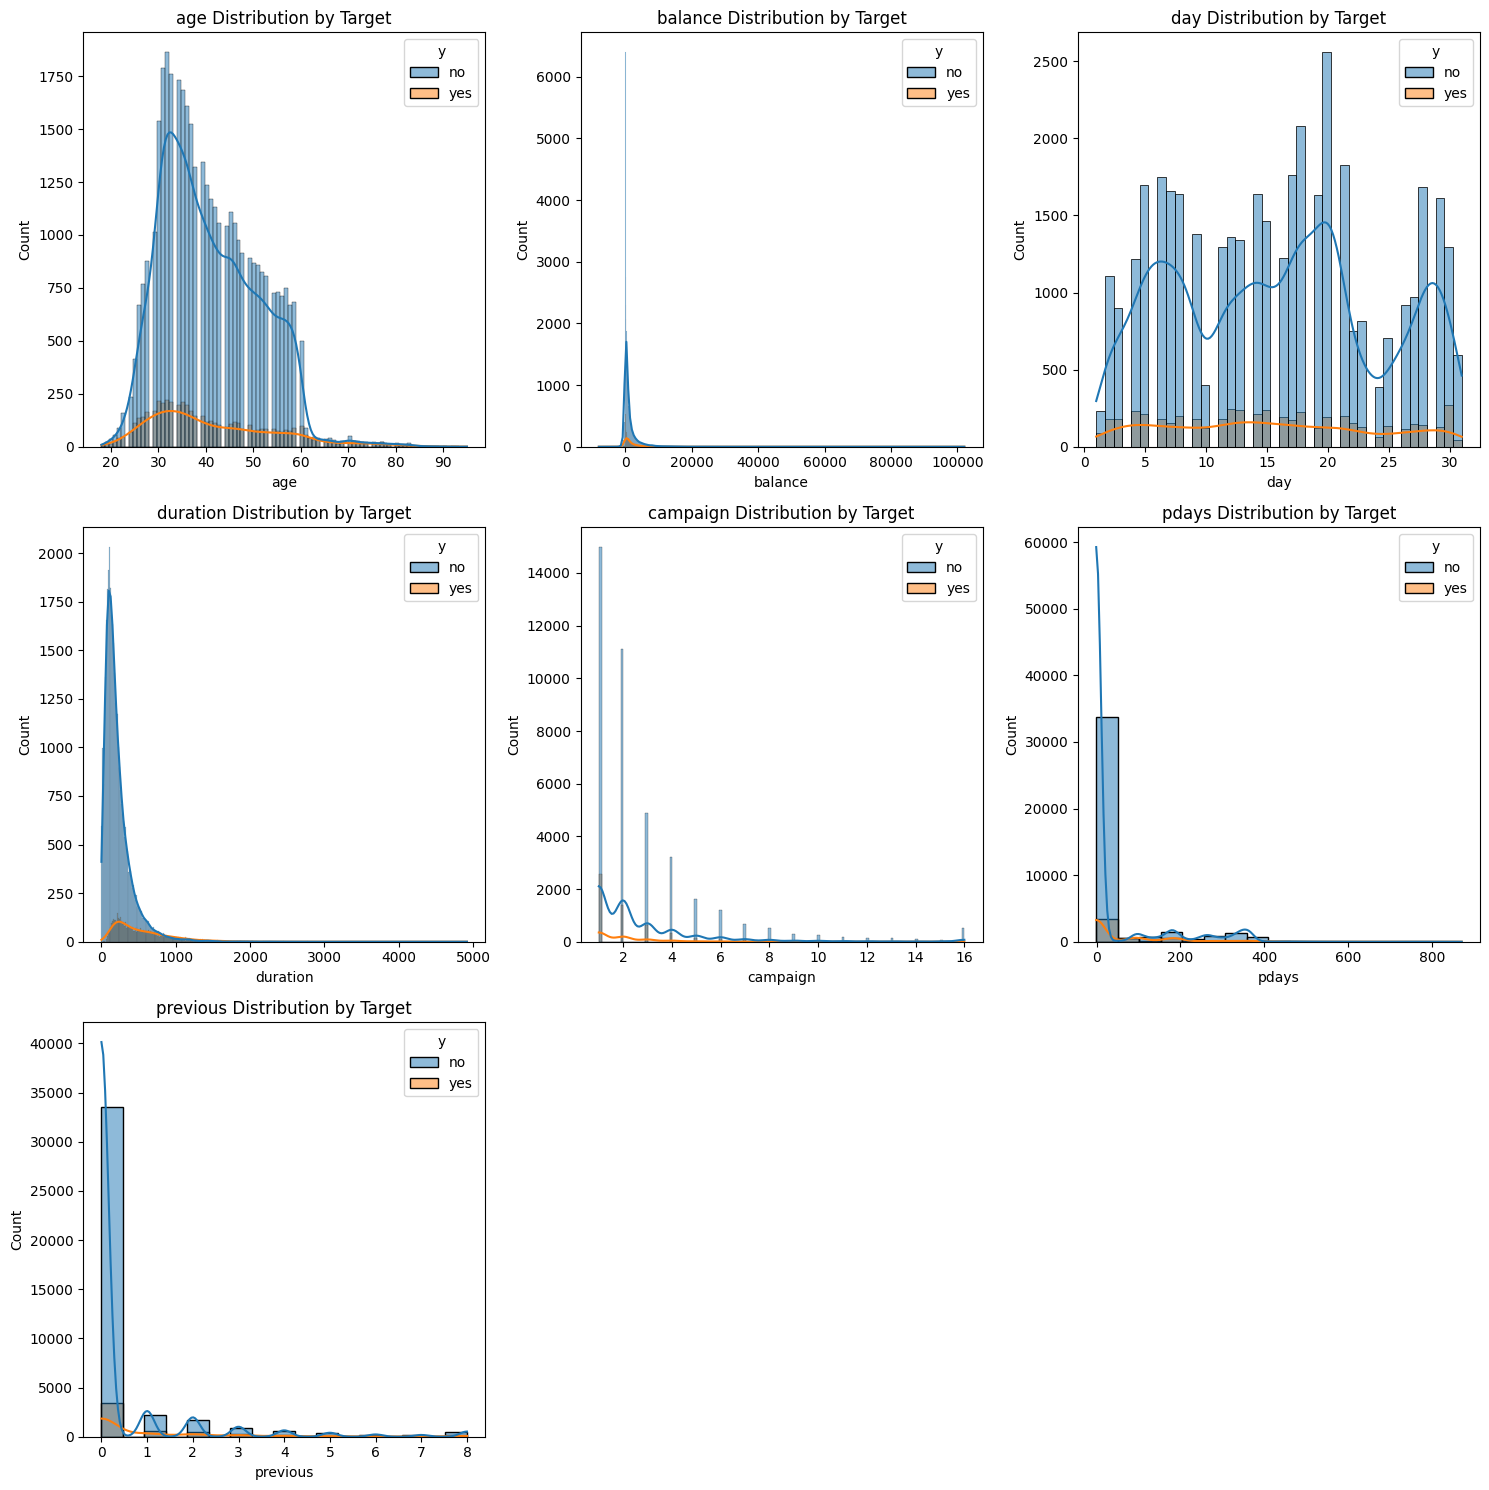

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of numerical columns (excluding the target 'y')
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 3  # Number of columns (adjust as needed)
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each numerical feature against the target 'y'
for i, col in enumerate(numerical_columns):
    # For histogram (numerical feature distribution by target 'y')
    sns.histplot(data=data, x=col, hue='y', kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Target')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [43]:
# for col in ['age', 'balance', 'campaign', 'duration']:
#     if data[col].dtype == 'int64':
#         # Calculate IQR for detecting outliers
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define the lower and upper limits for outliers
#         lower_limit = Q1 - 1.5 * IQR
#         upper_limit = Q3 + 1.5 * IQR

#         # Cap the values in the column to the defined limits
#         data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
#         data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

#         # Convert the column to integer type if it originally contained integers
    
#         data[col] = data[col].astype(int)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  duration   45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


# Feature Engineering

## Feature transformation

In [45]:
# # Drop or create a binary feature for 'pdays' (days since last contact)
data['previously_contacted'] = data['pdays'].apply(lambda x: 1 if x != -1 else 0)
# data = data.drop(['pdays'], axis=1)  # Drop 'pdays' if it leads to leakage



new changed pdays

In [46]:
import pandas as pd

# Define the bins and labels for 'pdays' based on the distribution of values in your dataset
bins = [-1, 0, 10, 30, 60, 100, 200, float('inf')]  # Adjust bins based on your data
labels = ['Not Contacted', '0-10 days', '11-30 days', '31-60 days', '61-100 days', '101-200 days', '200+ days']

# Replace -1 with 'Not Contacted' for easy handling and then bin the pdays values
data['pdays_binned'] = pd.cut(data['pdays'], bins=bins, labels=labels, right=False)

# Now, let's inspect the results
print(data[['pdays', 'pdays_binned']].head())




   pdays   pdays_binned
0     -1  Not Contacted
1     -1  Not Contacted
2     -1  Not Contacted
3     -1  Not Contacted
4     -1  Not Contacted


old

In [47]:
# Create an interaction feature for high balance and no previous contact
data['balance_no_previous'] = data['balance'] * (data['previous'] == 0)

## Encoding the data

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   45210 non-null  int64   
 1   job                   45210 non-null  object  
 2   marital               45210 non-null  object  
 3   education             45210 non-null  object  
 4   default               45210 non-null  object  
 5   balance               45210 non-null  int64   
 6   housing               45210 non-null  object  
 7   loan                  45210 non-null  object  
 8   contact               45210 non-null  object  
 9   day                   45210 non-null  int64   
 10  month                 45210 non-null  object  
 11  duration              45210 non-null  int64   
 12  campaign              45210 non-null  int64   
 13  pdays                 45210 non-null  int64   
 14  previous              45210 non-null  int64   
 15  poutcom

In [49]:
# Binary Features
binary_columns = ['default', 'housing', 'loan', 'y']

for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})


In [50]:
# Categorical Features
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] 


data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   45210 non-null  int64   
 1   default               45210 non-null  int64   
 2   balance               45210 non-null  int64   
 3   housing               45210 non-null  int64   
 4   loan                  45210 non-null  int64   
 5   day                   45210 non-null  int64   
 6   duration              45210 non-null  int64   
 7   campaign              45210 non-null  int64   
 8   pdays                 45210 non-null  int64   
 9   previous              45210 non-null  int64   
 10  y                     45210 non-null  int64   
 11  previously_contacted  45210 non-null  int64   
 12  pdays_binned          45210 non-null  category
 13  balance_no_previous   45210 non-null  int64   
 14  job_blue-collar       45210 non-null  bool    
 15  job_ent

In [52]:
# Apply One-Hot Encoding to the binned 'pdays' feature
data = pd.get_dummies(data, columns=['pdays_binned'])

# Check the result
print(data[['pdays_binned_Not Contacted', 'pdays_binned_0-10 days', 'pdays_binned_11-30 days']].head())

   pdays_binned_Not Contacted  pdays_binned_0-10 days  pdays_binned_11-30 days
0                        True                   False                    False
1                        True                   False                    False
2                        True                   False                    False
3                        True                   False                    False
4                        True                   False                    False


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         45210 non-null  int64
 1   default                     45210 non-null  int64
 2   balance                     45210 non-null  int64
 3   housing                     45210 non-null  int64
 4   loan                        45210 non-null  int64
 5   day                         45210 non-null  int64
 6   duration                    45210 non-null  int64
 7   campaign                    45210 non-null  int64
 8   pdays                       45210 non-null  int64
 9   previous                    45210 non-null  int64
 10  y                           45210 non-null  int64
 11  previously_contacted        45210 non-null  int64
 12  balance_no_previous         45210 non-null  int64
 13  job_blue-collar             45210 non-null  bool 
 14  job_entrepr

In [54]:
# data.to_csv('checkpday-cleaned.csv', index=False)

In [55]:
data = data.astype('int64')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         45210 non-null  int64
 1   default                     45210 non-null  int64
 2   balance                     45210 non-null  int64
 3   housing                     45210 non-null  int64
 4   loan                        45210 non-null  int64
 5   day                         45210 non-null  int64
 6   duration                    45210 non-null  int64
 7   campaign                    45210 non-null  int64
 8   pdays                       45210 non-null  int64
 9   previous                    45210 non-null  int64
 10  y                           45210 non-null  int64
 11  previously_contacted        45210 non-null  int64
 12  balance_no_previous         45210 non-null  int64
 13  job_blue-collar             45210 non-null  int64
 14  job_entrepr

## Feature selecting

correlation

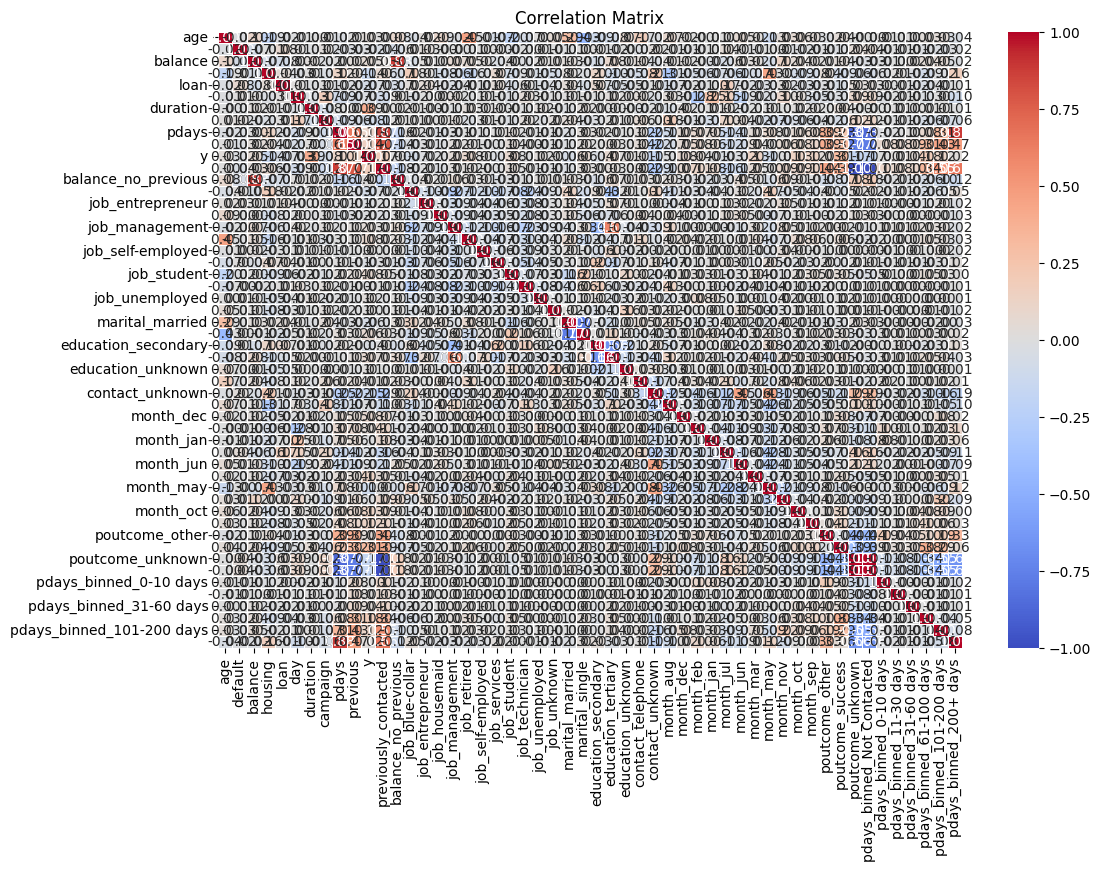

Highly correlated feature pairs: [('poutcome_unknown', 'pdays_binned_Not Contacted'), ('pdays_binned_Not Contacted', 'poutcome_unknown')]


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identify features with high correlation (e.g., correlation above 0.9)
high_corr = np.where(corr_matrix > 0.9)

# List pairs of highly correlated features
high_corr_pairs = [(data.columns[x], data.columns[y]) for x, y in zip(*high_corr) if x != y]
print("Highly correlated feature pairs:", high_corr_pairs)


In [58]:
correlation_matrix = data.corr()

correlation_with_y = correlation_matrix['y'].sort_values(ascending=False)

In [59]:
print("Correlation with y:")
print(correlation_with_y)

Correlation with y:
y                             1.000000
duration                      0.394525
poutcome_success              0.306787
pdays_binned_61-100 days      0.183734
previously_contacted          0.167289
previous                      0.144707
month_mar                     0.129455
month_oct                     0.128531
month_sep                     0.123185
pdays_binned_101-200 days     0.116453
pdays                         0.103645
job_retired                   0.079244
job_student                   0.076896
month_dec                     0.075164
education_tertiary            0.066463
marital_single                0.063521
balance                       0.052836
pdays_binned_31-60 days       0.038529
month_feb                     0.038456
job_management                0.032936
poutcome_other                0.032002
age                           0.025154
job_unemployed                0.020389
pdays_binned_200+ days        0.019103
contact_telephone             0.014040
pdays

In [60]:
# Drop 'duration' feature to avoid leakage
data = data.drop(['duration'], axis=1)

In [61]:
# drop the original 'pdays' feature
data = data.drop(columns=['pdays'])

In [62]:
data.to_csv('processed_data_Encoding.csv', index=False)

#  Normalize/Scale Numerical Features 

min max scaling

In [63]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# # numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# numerical_cols = ['balance', 'campaign',  'previous']

# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [64]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a pandas DataFrame called `df`
# numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


numerical_cols = ['age', 'balance', 'campaign', 'previous','balance_no_previous']

# Apply scaling only to the specified numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [65]:
# # Save the processed DataFrame to a CSV file
data.to_csv("processed_data_Scaling.csv", index=False)  # Use index=False to avoid saving the index as a separate column

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(data[numerical_cols])

# Create a DataFrame with the principal components
pca_columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)

data = pd.concat([data, pca_df], axis=1)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total variance explained: {explained_variance.sum()}")

data = data.dropna()

# Save the DataFrame with PCA components to a CSV file
data.to_csv("processed_data_PCA.csv", index=False)
print("Dataset with PCA components saved as 'dataset_with_pca.csv'")

Explained variance by each component: [0.38139492 0.21351563 0.19830036 0.18629369]
Total variance explained: 0.9795046042502168
Dataset with PCA components saved as 'dataset_with_pca.csv'


In [67]:
data.head()

,age,default,balance,housing,loan,day,campaign,previous,y,previously_contacted,...,pdays_binned_0-10 days,pdays_binned_11-30 days,pdays_binned_31-60 days,pdays_binned_61-100 days,pdays_binned_101-200 days,pdays_binned_200+ days,PC1,PC2,PC3,PC4
0,1.606945,0.0,0.256411,1.0,0.0,5.0,-0.654133,-0.366264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.696702,0.332916,1.096302,-1.246068
1,0.288524,0.0,-0.437896,1.0,0.0,5.0,-0.654133,-0.366264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.496276,0.162285,0.014199,-0.839680
2,-0.747378,0.0,-0.446764,1.0,1.0,5.0,-0.654133,-0.366264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.651265,0.068647,-0.922074,-0.435053
3,0.571043,0.0,0.047199,1.0,0.0,5.0,-0.654133,-0.366264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.249648,0.224185,0.192152,-0.873293
4,-0.747378,0.0,-0.447092,0.0,0.0,5.0,-0.654133,-0.366264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.651744,0.068622,-0.922021,-0.435105


In [68]:
# # Save the processed DataFrame to a CSV file
# data.to_csv("processed_data_PCA.csv", index=False)  # Use index=False to avoid saving the index as a separate column

# Split the Data

In [69]:
# from sklearn.model_selection import train_test_split

# # Separate features and target
# X = data.drop('y', axis=1)  # Assuming 'y' is your target column
# y = data['y']

# # # Split the dataset
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [70]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# x_smote, y_smote = smote.fit_resample(X, y)

In [71]:
# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42, stratify=y)

# MOdel IMpementing

## NN using tensorflow 

In [73]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score, classification_report

# # Build Neural Network Model
# nn_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# # Compile Model
# nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the Model
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# # Predictions
# nn_test_preds = (nn_model.predict(X_test) > 0.5).astype("int32")

# nn_ten =accuracy_score(y_test, nn_test_preds)

# # Evaluation
# print("Neural Network - Testing Accuracy:", nn_ten)
# print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))


## NN using pytorch

# Evaluation

In [77]:
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming you already have these variables
# # rf_y_pred_test: Predicted labels from Random Forest
# # nn_y_pred_test_pytorch: Predicted labels from PyTorch Neural Network (y_pred)
# # nn_y_pred_test_tensorflow: Predicted labels from TensorFlow Neural Network (nn_test_preds)
# # y_test: True labels (ground truth)

# # Calculate accuracies using the predicted labels
# rf_accuracy = accuracy_score(y_test, rf_y_pred_test)  # Random Forest Accuracy
# nn_accuracy = accuracy_score(y_test, y_pred)  # Neural Network Accuracy (PyTorch)
# nn_ten_accuracy = accuracy_score(y_test, nn_test_preds)  # Neural Network Accuracy (TensorFlow)

# # Printing the accuracies
# print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
# print(f"Neural Network Accuracy (PyTorch): {nn_accuracy:.4f}")
# print(f"Neural Network Accuracy (TensorFlow): {nn_ten_accuracy:.4f}")


In [78]:
# # Compare Accuracies
# rf_accuracy = accuracy_score(y_test, rf_y_pred_test)  # Corrected variable
# nn_accuracy = accuracy_score(y_true, y_pred)

# print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
# print(f"Neural Network Accuracy Pytorch: {nn_accuracy:.4f}")
# print(f"Neural Network Accuracy tensorflow: {nn_ten:.4f}")

# if nn_accuracy > rf_accuracy:
#     print("Neural Network performs better.")
# elif rf_accuracy > nn_accuracy:
#     print("Random Forest performs better.")
# else:
#     print("Both models perform equally well.")


In [79]:
# import matplotlib.pyplot as plt

# # List of model names and their corresponding accuracies
# model_names = ['Random Forest', 'Neural Network (PyTorch)', 'Neural Network (TensorFlow)']
# accuracies = [rf_accuracy, nn_accuracy, nn_ten_accuracy]

# # Create the bar chart
# plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])

# # Set the y-axis limit to range from 0 to 1 (accuracy is between 0 and 1)
# plt.ylim(0, 1)

# # Add labels and title
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')

# # Display the bar chart
# plt.show()


In [80]:
# # Bar Chart for Accuracy Comparison
# model_names = ['Random Forest', 'Neural Network']
# accuracies = [rf_accuracy, nn_accuracy]

# plt.bar(model_names, accuracies, color=['blue', 'orange'])
# plt.ylim(0, 1)
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')
# plt.show()


# Tunning

#### RF tunning

In [81]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4 ],
#     'class_weight': ['balanced', 'balanced_subsample']
# }

# # param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'max_depth': [10, 20, 30],
# #     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 4],
# #     'max_features': ['sqrt', 'log2', None],
# #     # 'bootstrap': [True, False]
# # }

# # Initialize Random Forest and GridSearch
# rf_model = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# # Fit GridSearch
# grid_search.fit(X_train, y_train)

# # Best Parameters
# print("Best Parameters:", grid_search.best_params_)

# # Use the best model
# best_rf_model = grid_search.best_estimator_


# # Make predictions
# rf_tune_y_pred_train = best_rf_model.predict(X_train)
# rf_tune_y_pred_test = best_rf_model.predict(X_test)

# # Evaluate
# print("Random Forest Post-Tuning - Training Accuracy:", accuracy_score(y_train, rf_tune_y_pred_train))
# print("Random Forest Post-Tuning - Test Accuracy:", accuracy_score(y_test, rf_tune_y_pred_test))

# # Classification Report
# print("Random Forest Post-Tuning - Classification Report:")
# print(classification_report(y_test, rf_tune_y_pred_test))

# ## Confusion Matrix
# conf_matrix = confusion_matrix(y_test, rf_tune_y_pred_test)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.title("Random Forest - Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()


In [82]:
# # Get predicted probabilities for the positive class
# y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

# from sklearn.metrics import roc_auc_score

# # Calculate ROC-AUC score
# roc_auc = roc_auc_score(y_test, y_pred_prob)
# print("ROC-AUC Score:", roc_auc)



In [83]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve

# # Get ROC curve data
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Plot the ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()


In [84]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     # 'bootstrap': [True, False]
# }

# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best hyperparameters and cross-validated accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# # Use the best model to predict on the test set
# best_rf_model = grid_search.best_estimator_
# rf_y_pred_test = best_rf_model.predict(X_test)

# rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test)

# # Evaluate on the test set
# print("Random Forest - Test Accuracy after Tuning:", rf_accuracy_tuned)
# print("Random Forest - Classification Report after Tuning:")
# print(classification_report(y_test, rf_y_pred_test))


#### tenorflow

In [85]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score, classification_report
# import keras_tuner as kt  # Import Keras Tuner

# # Define the model builder function for hyperparameter tuning
# def build_model(hp):
#     model = Sequential()
#     # Input Layer
#     model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32), 
#                     activation='relu', input_shape=(X_train.shape[1],), name="Input_Layer"))
#     # Hidden Layers
#     for i in range(hp.Int('num_hidden_layers', 1, 3)):  # 1 to 3 hidden layers
#         model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=16), 
#                         activation='relu', name=f"Hidden_Layer{i+1}"))
#     # Output Layer
#     model.add(Dense(1, activation='sigmoid', name="Output_Layer"))

#     # Compile the model
#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#     )
#     return model

# # Initialize the tuner
# tuner = kt.RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=10,  # Number of hyperparameter combinations to try
#     executions_per_trial=2,  # Number of models to train for each trial
#     directory='hyper_tuning',
#     project_name='nn_tuning'
# )

# # Early stopping to prevent overfitting
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# # Perform the search
# tuner.search(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The optimal number of units in the input layer is {best_hps.get('units_input')}.
# The optimal number of hidden layers is {best_hps.get('num_hidden_layers')}.
# The optimal learning rate is {best_hps.get('learning_rate')}.
# """)

# # Train the best model
# best_model = tuner.hypermodel.build(best_hps)
# history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# # Evaluate the tuned model on the test set
# nn_test_preds = (best_model.predict(X_test) > 0.5).astype("int32")
# nn_tenorflow_test_accuracy = accuracy_score(y_test, nn_test_preds)
# print("Testing Accuracy after Tuning:", nn_tenorflow_test_accuracy)
# print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))




#### NN tunnung 

In [86]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import accuracy_score
# from torch.utils.data import DataLoader, TensorDataset

# # Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Define the Neural Network
# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Function to train the model
# def train_model(model, train_loader, criterion, optimizer, device, epochs=20):
#     model.train()
#     for epoch in range(epochs):
#         epoch_loss = 0
#         for X_batch, y_batch in train_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             optimizer.zero_grad()
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             loss.backward()
#             optimizer.step()
#             epoch_loss += loss.item()
#         print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

# # Function to evaluate the model
# def evaluate_model(model, test_loader, device):
#     model.eval()
#     y_pred, y_true = [], []
#     with torch.no_grad():
#         for X_batch, y_batch in test_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
#             y_true.extend(y_batch.cpu().numpy())
#     return accuracy_score(y_true, y_pred)

# # Hyperparameter search
# hidden_sizes = [32, 64, 128]
# learning_rates = [0.001, 0.01, 0.1]
# batch_sizes = [16, 32, 64]

# best_accuracy = 0
# best_hyperparameters = {}

# for hidden_size in hidden_sizes:
#     for lr in learning_rates:
#         for batch_size in batch_sizes:
#             # Prepare data loaders
#             train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
#                                            torch.tensor(y_train.values, dtype=torch.long))
#             test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
#                                           torch.tensor(y_test.values, dtype=torch.long))
#             train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#             test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#             # Initialize model, loss, and optimizer
#             model = NeuralNet(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=2).to(device)
#             criterion = nn.CrossEntropyLoss()
#             optimizer = optim.Adam(model.parameters(), lr=lr)

#             # Train and evaluate
#             train_model(model, train_loader, criterion, optimizer, device, epochs=20)
#             accuracy = evaluate_model(model, test_loader, device)

#             # Save best hyperparameters
#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_hyperparameters = {'hidden_size': hidden_size, 'lr': lr, 'batch_size': batch_size}

#             print(f"Hidden Size: {hidden_size}, LR: {lr}, Batch Size: {batch_size}, Accuracy: {accuracy:.4f}")

# # Output the best hyperparameters
# print(f"Best Hyperparameters: {best_hyperparameters}")
# print(f"Best Accuracy: {best_accuracy:.4f}")


# evaluation

In [87]:
# from sklearn.metrics import accuracy_score, classification_report

# # After tuning, you already have the best_rf_model (tuned Random Forest model)

# # Predict the outcomes on the test set
# rf_y_pred_test_tuned = best_rf_model.predict(X_test)

# # Calculate accuracy after tuning for the Random Forest model
# rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test_tuned)


# ### delete above

# # Print the accuracy after tuning
# print(f"Random Forest Accuracy (Tuned): {rf_accuracy_tuned:.4f}")

# # Optionally, print the classification report for further evaluation
# print("\nRandom Forest Classification Report (Tuned):")
# print(classification_report(y_test, rf_y_pred_test_tuned))


In [88]:
# # Output the best hyperparameters
# print(f"Best Hyperparameters: {best_hyperparameters}")
# print(f"Best Accuracy: {best_accuracy:.4f}")



In [89]:

# # Print the accuracy after tuning
# print(f"TensorFlow Neural Network Accuracy (Tuned): {nn_tenorflow_test_accuracy:.4f}")

# # Optionally, print the classification report for further evaluation
# print("\nTensorFlow Neural Network Classification Report (Tuned):")
# print(classification_report(y_test, nn_test_preds))


In [90]:
# import matplotlib.pyplot as plt

# # List of model names and their corresponding accuracies
# model_names = ['Random Forest', 'Neural Network (PyTorch)', 'Neural Network (TensorFlow)']
# accuracies = [rf_accuracy_tuned, best_accuracy, nn_tenorflow_test_accuracy]

# # Create the bar chart
# plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])

# # Set the y-axis limit to range from 0 to 1 (accuracy is between 0 and 1)
# plt.ylim(0, 1)

# # Add labels and title
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')

# # Display the bar chart
# plt.show()

# saving the model

In [91]:
# import joblib

# # Save the best Random Forest model
# joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
# print("Random Forest model saved successfully!")


In [92]:
# # Save the entire model
# torch.save(model, 'best_tuned_model_PY.pth')
# print("Tuned model saved successfully!")

In [93]:
# # Save the tuned model
# best_model.save("best_tuned_mode_Ten.h5")
# print("Tuned model saved as 'best_tuned_model.h5'")